<a href="https://colab.research.google.com/github/T-Emmanuel/CANADIAN-POSTSECONDARY-GRADUATE-MEDIAN-INCOME-AND-CHACTERISTICS-ANALYSIS/blob/main/Characteristics_and_median_employment_income_of_postsecondary_graduates_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHARACTERISTICS AND MEDIAN EMPLOYMENT INCOME OF POSTSECONDARY GRADUATES AFTER GRADUATION BY EDUCATIONAL QUALIFICATION AND FIELD OF STUDY.

Aims of project:

1: To actualize the general and gender based distribution of the different graduate fields of studies,

2:To find out the distribution trend of graduates by locations in Canada over the three years,


3:Expose the status of postsecondary graduates by gender and age group, and


4:To determine the top 10 most and less paid graduates’ field over the 3 years.



SOURCE OF DATA:

IMPORTING NECESARY LIBRARIES

In [ ]:
# Data Handling and Manipulation
import pandas as pd
import numpy as np
import gdown


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno


# Machine Learning - Preprocessing and Modeling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Machine Learning - Evaluation
from sklearn import metrics
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score

# Install gdown if needed (for Google Drive downloads)
%pip install gdown

# Your code for data loading, analysis, modeling, and evaluation...


Loading the dataset.

In [ ]:
# Google Drive file ID
file_id = "147z5YCAbQ3MSKENMbl17EAY5u2yK8yDZ"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"  # Replace with your desired file name

# Download the file
gdown.download(url, output, quiet=False)

# Load the CSV file
df = pd.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?id=147z5YCAbQ3MSKENMbl17EAY5u2yK8yDZ
From (redirected): https://drive.google.com/uc?id=147z5YCAbQ3MSKENMbl17EAY5u2yK8yDZ&confirm=t&uuid=dea13b44-0ea6-49a9-8f5f-5c59bc0d85bc
To: /content/data.csv
100%|██████████| 287M/287M [00:02<00:00, 100MB/s] 


# Uderstanding the data

In [ ]:
#printing the last 5 rows
df.tail(5)

,REF_DATE,GEO,DGUID,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,...,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1048570,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian and international students,Graduates reporting employment income,Median employment income,...,439,units,0,v1011472162,5.11.16.2.1.1.4.2,60400.0,NaN,NaN,NaN,0
1048571,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian and international students,"Graduates reporting wages, salaries and commis...",Number of graduates,...,223,units,0,v1011472163,5.11.16.2.1.1.5.1,150.0,NaN,NaN,NaN,0
1048572,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,...,439,units,0,v1011472164,5.11.16.2.1.1.5.2,60900.0,NaN,NaN,NaN,0
1048573,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian students,All graduates,Number of graduates,...,223,units,0,v1011472165,5.11.16.2.1.2.1.1,180.0,NaN,NaN,NaN,0
1048574,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian students,Graduates with no income information,Number of graduates,...,223,units,0,v1011472166,5.11.16.2.1.2.2.1,0.0,NaN,NaN,NaN,0


In [ ]:
# printing the first 5 rows
df.head(5)

,REF_DATE,GEO,DGUID,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,...,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,...,223,units,0,v1010569488,1.1.1.1.1.1.1.1,321590.0,NaN,NaN,NaN,0
1,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,...,223,units,0,v1010569489,1.1.1.1.1.1.2.1,40400.0,NaN,NaN,NaN,0
2,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,...,223,units,0,v1010569490,1.1.1.1.1.1.3.1,30620.0,NaN,NaN,NaN,0
3,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates reporting employment income,Number of graduates,...,223,units,0,v1010569491,1.1.1.1.1.1.4.1,250560.0,NaN,NaN,NaN,0
4,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,"Graduates reporting wages, salaries and commis...",Number of graduates,...,223,units,0,v1010569492,1.1.1.1.1.1.5.1,218490.0,NaN,NaN,NaN,0


In [ ]:
#checking the columns in the dataset
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Educational qualification',
       'Field of study', 'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [ ]:
# Check the general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   REF_DATE                          1048575 non-null  int64  
 1   GEO                               1048575 non-null  object 
 2   DGUID                             1048575 non-null  object 
 3   Educational qualification         1048575 non-null  object 
 4   Field of study                    1048575 non-null  object 
 5   Gender                            1048575 non-null  object 
 6   Age group                         1048575 non-null  object 
 7   Status of student in Canada       1048575 non-null  object 
 8   Characteristics after graduation  1048575 non-null  object 
 9   Graduate statistics               1048575 non-null  object 
 10  UOM                               1048575 non-null  object 
 11  UOM_ID                            104

In [ ]:
#checking the data types
df.dtypes

,0
REF_DATE,int64
GEO,object
DGUID,object
Educational qualification,object
Field of study,object
Gender,object
Age group,object
Status of student in Canada,object
Characteristics after graduation,object
Graduate statistics,object


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values) # printing columns with missing values

Columns with missing values:
 VALUE          189718
STATUS         858857
SYMBOL        1048575
TERMINATED    1048575
dtype: int64


<Axes: >

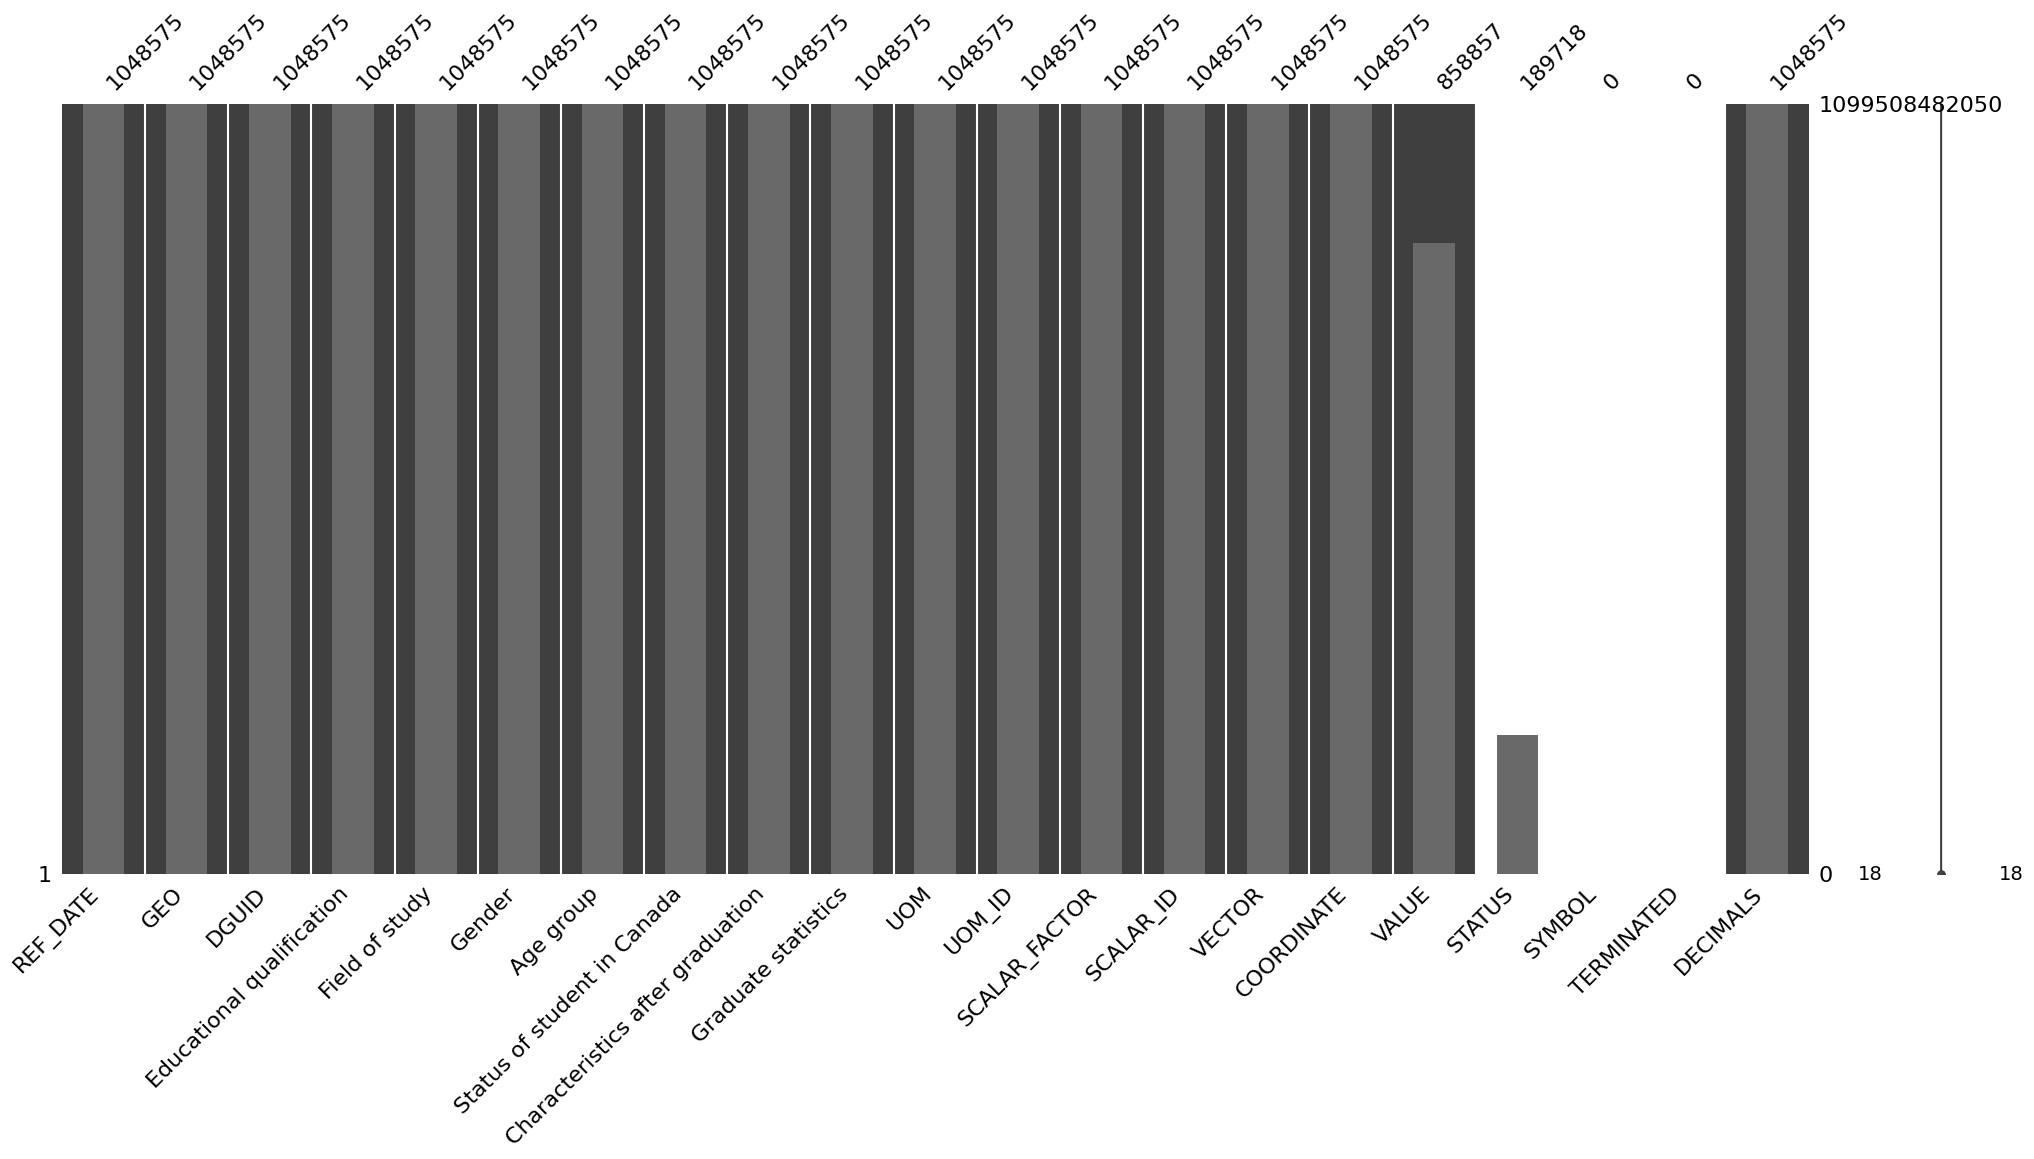

In [ ]:
# Visualize missing data pattern
msno.matrix(df)
msno.bar(df) # creates a bar chart of all the columns showing those with missing values and those without

In [ ]:
df.STATUS.unique()

array([nan, '..', 'x'], dtype=object)

## **DATA CLEANING**

In [ ]:
#HANDLING MISSING VALUES
# Impute missing values in 'VALUE' using the mean
imputer = SimpleImputer(strategy='mean')
df['VALUE'] = imputer.fit_transform(df[['VALUE']])

# Impute missing values in 'STATUS' using the mode
imputer = SimpleImputer(strategy='most_frequent')


In [ ]:
df.shape # prints the number of rows by columns of the dataset

(1048575, 21)

# Dropping irrelevant columnns

In [ ]:
# List of columns to remove
columns_to_remove = [
    'VECTOR',
    'COORDINATE',
    'DECIMALS',
    'DGUID',
    'SCALAR_FACTOR',
    'SCALAR_ID',
    'UOM',
    'UOM_ID',
    'TERMINATED',
    'SYMBOL',
    'STATUS',
]

# Remove the specified columns
df_cleaned = df.drop(columns=columns_to_remove)

# Verify the removal by checking the remaining columns
print(df_cleaned.columns)


Index(['REF_DATE', 'GEO', 'Educational qualification', 'Field of study',
       'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'VALUE'],
      dtype='object')


In [ ]:
# checking the shape of the dataset
df_cleaned.shape

(1048575, 10)

In [ ]:
# Check the general information about dataset after dropping
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   REF_DATE                          1048575 non-null  int64  
 1   GEO                               1048575 non-null  object 
 2   Educational qualification         1048575 non-null  object 
 3   Field of study                    1048575 non-null  object 
 4   Gender                            1048575 non-null  object 
 5   Age group                         1048575 non-null  object 
 6   Status of student in Canada       1048575 non-null  object 
 7   Characteristics after graduation  1048575 non-null  object 
 8   Graduate statistics               1048575 non-null  object 
 9   VALUE                             1048575 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 80.0+ MB


In [ ]:
# Getting top 3 rows after cleaning
df_cleaned.tail(3)

,REF_DATE,GEO,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,VALUE
1048572,2012,New Brunswick,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,60900.0
1048573,2012,New Brunswick,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian students,All graduates,Number of graduates,180.0
1048574,2012,New Brunswick,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian students,Graduates with no income information,Number of graduates,0.0


In [ ]:
# View summary statistics for numerical columns after dropping
df_cleaned.describe()

,REF_DATE,VALUE
count,1.048575e+06,1.048575e+06
mean,2.010768e+03,8.887605e+03
std,7.195318e-01,2.199303e+04
min,2.010000e+03,0.000000e+00
25%,2.010000e+03,1.000000e+01
50%,2.011000e+03,4.000000e+01
75%,2.011000e+03,8.887605e+03
max,2.012000e+03,3.458600e+05


In [ ]:
df_cleaned.head(3)

,REF_DATE,GEO,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,VALUE
0,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,321590.0
1,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,40400.0
2,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,30620.0


In [ ]:
import re #The statement import re is used to import the regular expression module in Python.
import pandas as pd

def rename_and_filter(df, criteria):
    """Renames columns and filters rows based on criteria.

    Args:
        df: The Pandas DataFrame.
        criteria: A dictionary mapping columns to values to exclude.

    Returns:
        The filtered DataFrame with renamed columns.
    """
    # Rename columns
    new_columns = {col: re.sub(r"[\s]+", "_", col.lower().strip()) for col in df.columns}
    df = df.rename(columns=new_columns)

    # Filter rows
    mask = True
    for column, values in criteria.items():
        # Rename column in criteria if needed
        renamed_column = re.sub(r"[\s]+", "_", column.lower().strip())
        mask &= ~df[renamed_column].isin(values)

    df_filtered = df[mask]
    return df_filtered

# Define your criteria
criteria = {
    'GEO': ['Canada'],
    'Educational qualification': ['Total, educational qualification'],
    'Field of study': ['Total, field of study'],
    'Gender': ['Total, gender'],
    'Age group': ['15 to 64 years'],
    'Status of student in Canada': ['Canadian and international students'],
    'Characteristics after graduation': ['All graduates']
}

# Apply the function
df_cleaned = rename_and_filter(df_cleaned, criteria)

# Now df_cleaned contains the filtered data with renamed columns
df_cleaned.shape

(106348, 10)

In [ ]:
df_cleaned.head(3)

,ref_date,geo,educational_qualification,field_of_study,gender,age_group,status_of_student_in_canada,characteristics_after_graduation,graduate_statistics,value
96788,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,15 to 34 years,Canadian students,Graduates with no income information,Number of graduates,0.0
96789,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,15 to 34 years,Canadian students,Full-time students,Number of graduates,0.0
96790,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,15 to 34 years,Canadian students,Graduates reporting employment income,Number of graduates,0.0


In [ ]:
df_cleaned.columns

Index(['ref_date', 'geo', 'educational_qualification', 'field_of_study',
       'gender', 'age_group', 'status_of_student_in_canada',
       'characteristics_after_graduation', 'graduate_statistics', 'value'],
      dtype='object')

# Hadling outliers

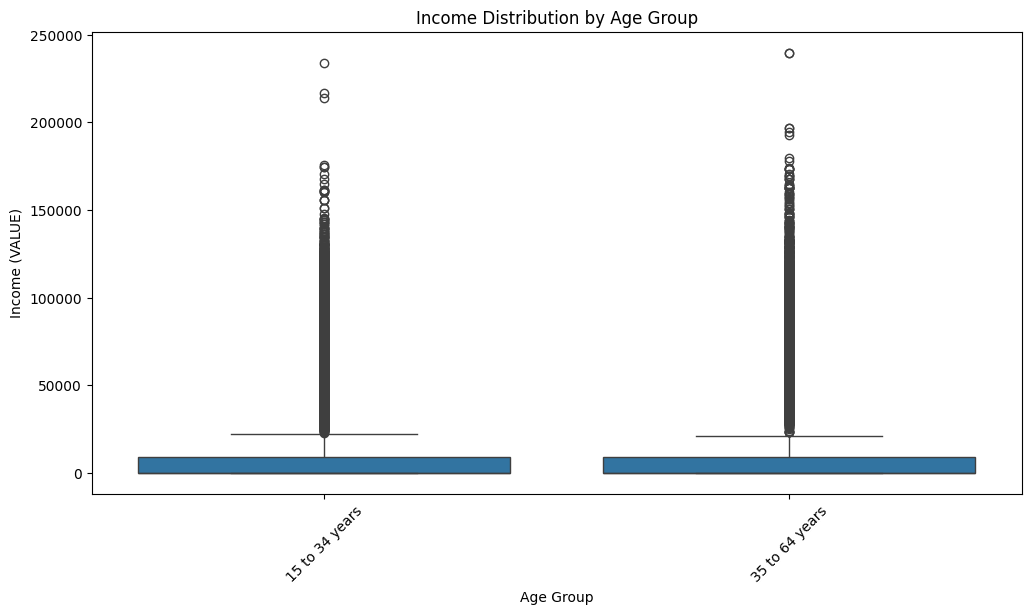

In [ ]:
# Box plot for income by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='age_group', y='value')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income (VALUE)')
plt.xticks(rotation=45)
plt.show()



In [ ]:
def find_outliers_iqr(data, column):
    """Identifies outliers using the IQR method.

    Args:
        data: The Pandas DataFrame.
        column: The name of the column to analyze.

    Returns:
        A list of indices corresponding to outlier rows.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
    return outliers


outlier_indices = find_outliers_iqr(df_cleaned, 'value')
print("Outlier Indices:", outlier_indices)

Outlier Indices: Index([  96823,   96825,   96931,   96933,   97101,   97103,   97117,   97119,
         97147,   97149,
       ...
       1047811, 1047935, 1048029, 1048031, 1048063, 1048065, 1048372, 1048374,
       1048419, 1048421],
      dtype='int64', length=10398)


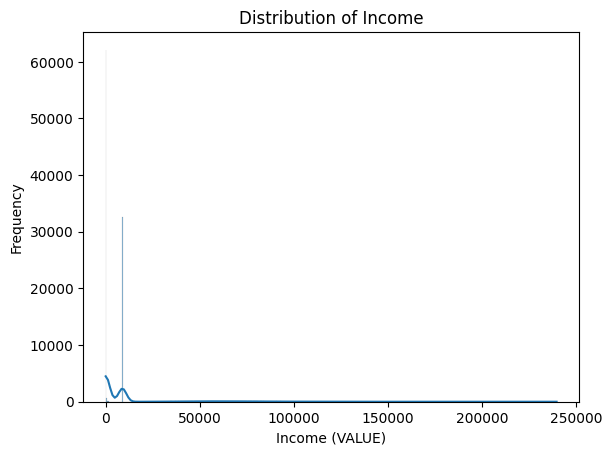

In [ ]:
sns.histplot(data=df_cleaned, x='value', kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income (VALUE)')
plt.ylabel('Frequency')
plt.show()

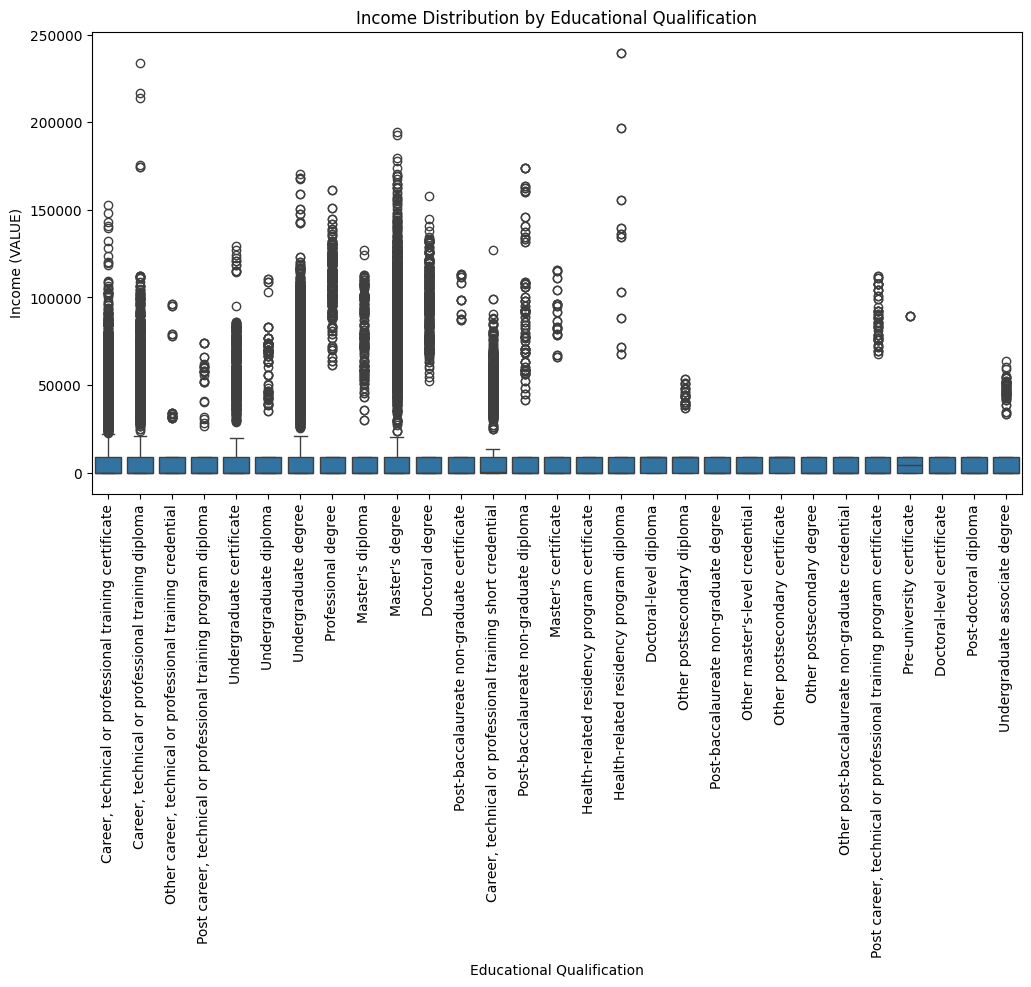

In [ ]:
# Box plot for income by Educational Qualification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='educational_qualification', y='value')
plt.title('Income Distribution by Educational Qualification')
plt.xlabel('Educational Qualification')
plt.ylabel('Income (VALUE)')
plt.xticks(rotation=90)
plt.show()



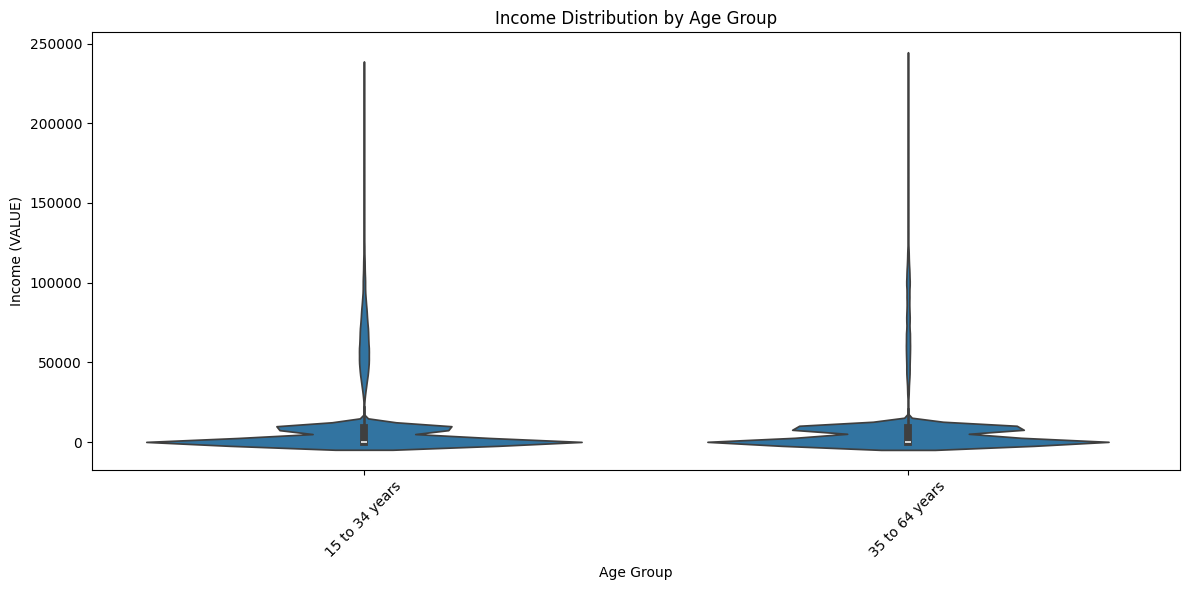

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.violinplot(data=df_cleaned, x='age_group', y='value')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income (VALUE)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

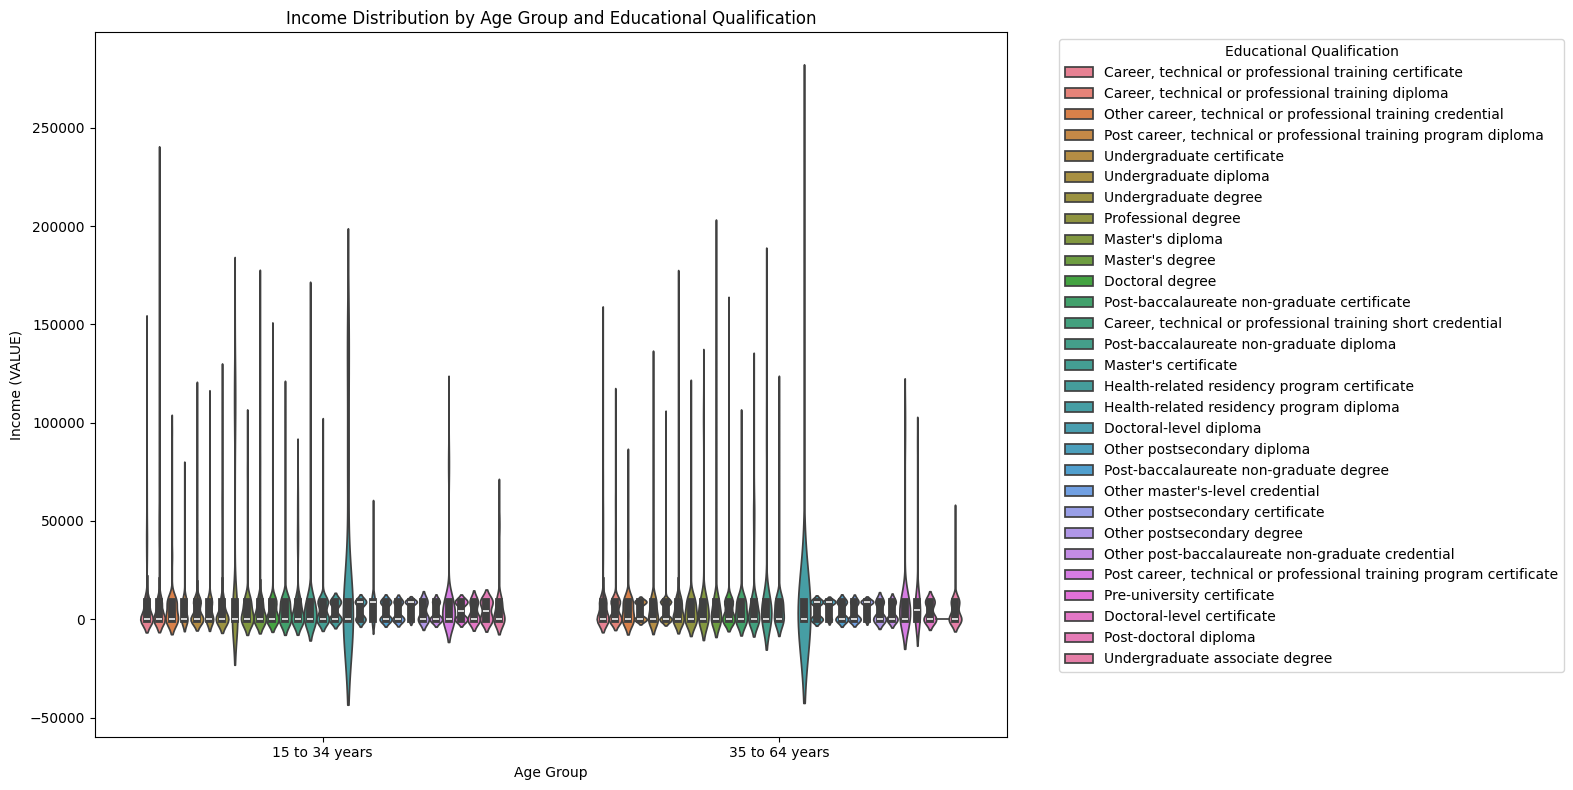

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.violinplot(data=df_cleaned, x='age_group', y='value', hue='educational_qualification', dodge=True)
plt.title('Income Distribution by Age Group and Educational Qualification')
plt.xlabel('Age Group')
plt.ylabel('Income (VALUE)')
plt.legend(title='Educational Qualification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

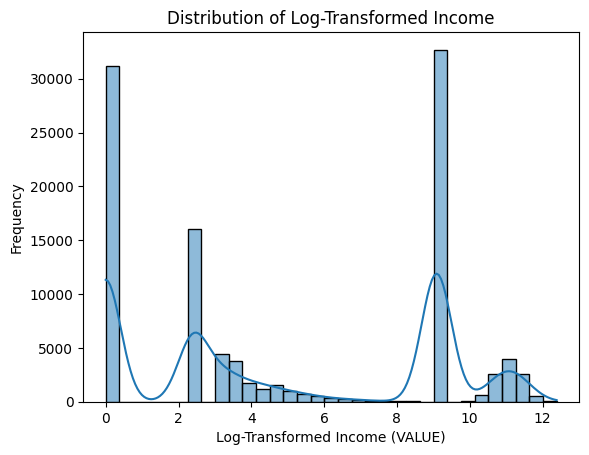

In [ ]:
# Apply logarithmic transformation
df_cleaned['value_log'] = np.log1p(df_cleaned['value'])

# Visualize the transformed data
sns.histplot(data=df_cleaned, x='value_log', kde=True)
plt.title('Distribution of Log-Transformed Income')
plt.xlabel('Log-Transformed Income (VALUE)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_cleaned.head(10)

,ref_date,geo,educational_qualification,field_of_study,gender,age_group,status_of_student_in_canada,characteristics_after_graduation,graduate_statistics,value,value_log
96788,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,15 to 34 years,Canadian students,Graduates with no income information,Number of graduates,0.000000,0.000000
96789,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,15 to 34 years,Canadian students,Full-time students,Number of graduates,0.000000,0.000000
96790,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,15 to 34 years,Canadian students,Graduates reporting employment income,Number of graduates,0.000000,0.000000
96791,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,15 to 34 years,Canadian students,"Graduates reporting wages, salaries and commis...",Number of graduates,0.000000,0.000000
96796,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,35 to 64 years,Canadian students,Graduates reporting employment income,Number of graduates,0.000000,0.000000
96797,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Man,35 to 64 years,Canadian students,Graduates reporting employment income,Median employment income,8887.605096,9.092525
96820,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Woman,15 to 34 years,Canadian students,Graduates with no income information,Number of graduates,0.000000,0.000000
96821,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Woman,15 to 34 years,Canadian students,Full-time students,Number of graduates,0.000000,0.000000
96822,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Woman,15 to 34 years,Canadian students,Graduates reporting employment income,Number of graduates,30.000000,3.433987
96823,2010,Newfoundland and Labrador,"Career, technical or professional training cer...","Business, management and public administration...",Woman,15 to 34 years,Canadian students,Graduates reporting employment income,Median employment income,30000.000000,10.308986


In [ ]:
df_cleaned.tail(30)

,ref_date,geo,educational_qualification,field_of_study,gender,age_group,status_of_student_in_canada,characteristics_after_graduation,graduate_statistics,value,value_log
1048374,2012,New Brunswick,Undergraduate degree,History [54],Man,15 to 34 years,Canadian students,"Graduates reporting wages, salaries and commis...",Median employment income,57900.000000,10.966490
1048376,2012,New Brunswick,Undergraduate degree,History [54],Man,15 to 34 years,International students,Graduates reporting employment income,Number of graduates,0.000000,0.000000
1048377,2012,New Brunswick,Undergraduate degree,History [54],Man,15 to 34 years,International students,Graduates reporting employment income,Median employment income,8887.605096,9.092525
1048378,2012,New Brunswick,Undergraduate degree,History [54],Man,15 to 34 years,International students,"Graduates reporting wages, salaries and commis...",Number of graduates,10.000000,2.397895
1048379,2012,New Brunswick,Undergraduate degree,History [54],Man,15 to 34 years,International students,"Graduates reporting wages, salaries and commis...",Median employment income,8887.605096,9.092525
1048387,2012,New Brunswick,Undergraduate degree,History [54],Man,35 to 64 years,Canadian students,Graduates with no income information,Number of graduates,8887.605096,9.092525
1048388,2012,New Brunswick,Undergraduate degree,History [54],Man,35 to 64 years,Canadian students,Graduates reporting employment income,Number of graduates,0.000000,0.000000
1048389,2012,New Brunswick,Undergraduate degree,History [54],Man,35 to 64 years,Canadian students,Graduates reporting employment income,Median employment income,8887.605096,9.092525
1048390,2012,New Brunswick,Undergraduate degree,History [54],Man,35 to 64 years,Canadian students,"Graduates reporting wages, salaries and commis...",Number of graduates,10.000000,2.397895
1048391,2012,New Brunswick,Undergraduate degree,History [54],Man,35 to 64 years,Canadian students,"Graduates reporting wages, salaries and commis...",Median employment income,8887.605096,9.092525


In [ ]:
df_cleaned['status_of_student_in_canada'].unique() # checking the effect of manipulation on the colum of status of student in canada

array(['Canadian students', 'International students'], dtype=object)

## DATA **ANALYSIS**

# Count the occurrences of each gender


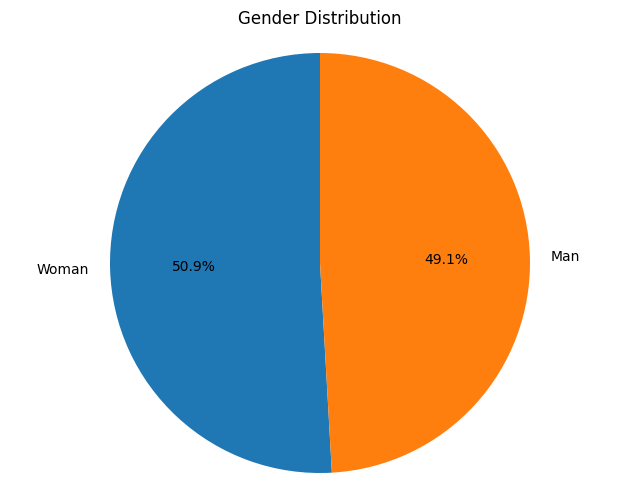

In [ ]:
# Count the occurrences of each gender
gender_counts = df_cleaned['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#Graduation Trend Over Time

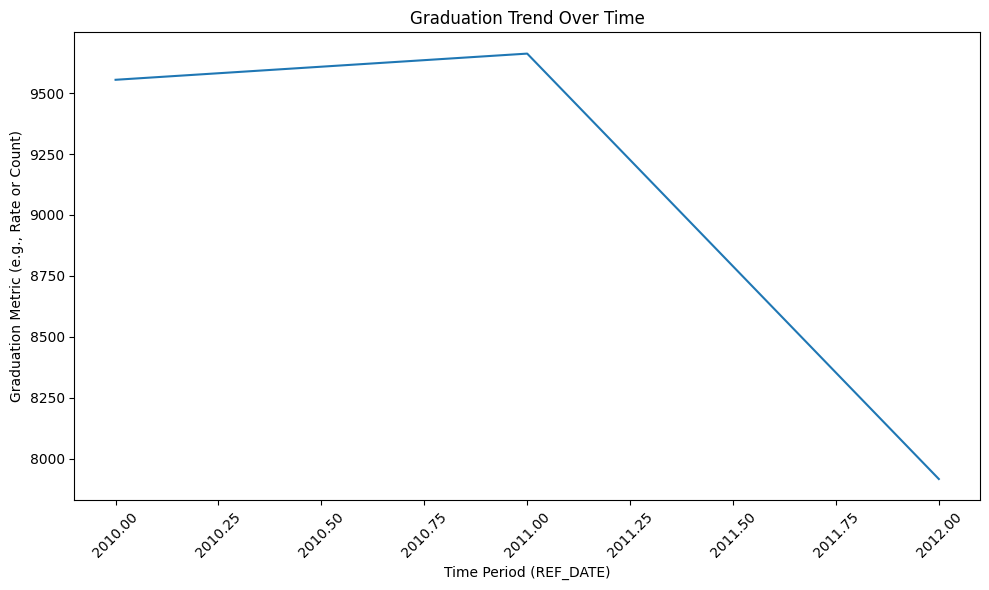

In [ ]:
# Group data by time and calculate the graduation metric (e.g., mean of 'value')
graduation_trend = df_cleaned.groupby('ref_date')['value'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=graduation_trend, x='ref_date', y='value')
plt.title('Graduation Trend Over Time')
plt.xlabel('Time Period (REF_DATE)')
plt.ylabel('Graduation Metric (e.g., Rate or Count)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

#Distribution of Educational Qualification

<ipython-input-34-7313f99e077c>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


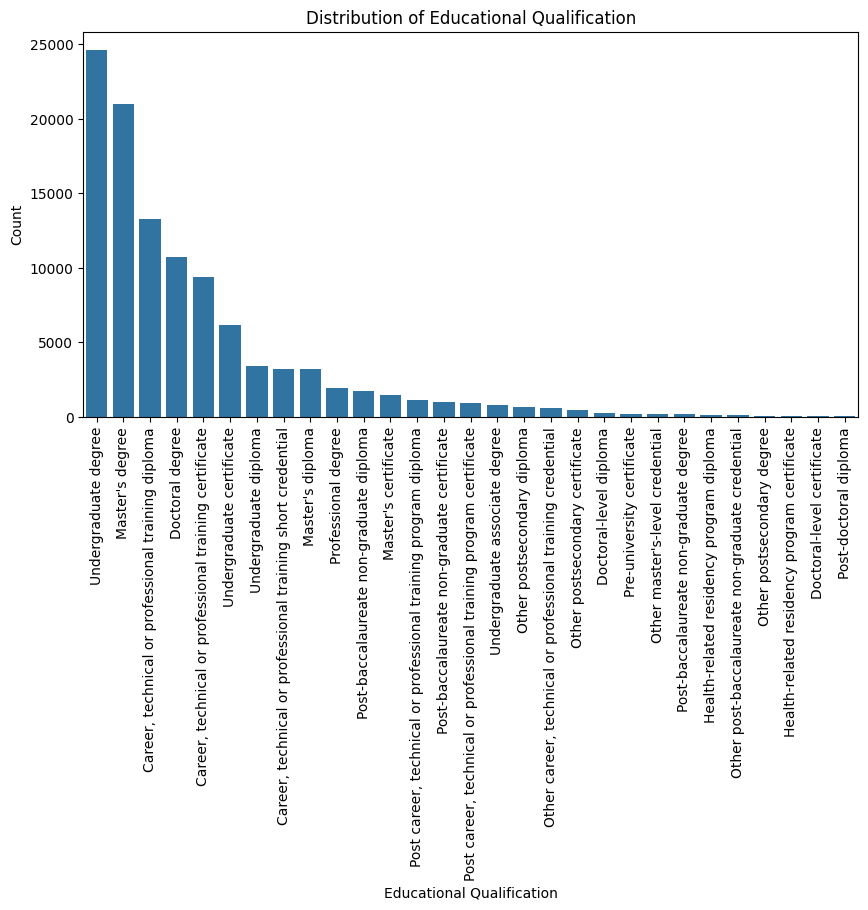

In [ ]:
# Count the occurrences of each educational qualification
edu_qual_counts = df_cleaned['educational_qualification'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_qual_counts.index, y=edu_qual_counts.values)
plt.title('Distribution of Educational Qualification')
plt.xlabel('Educational Qualification')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Field of Study distribution

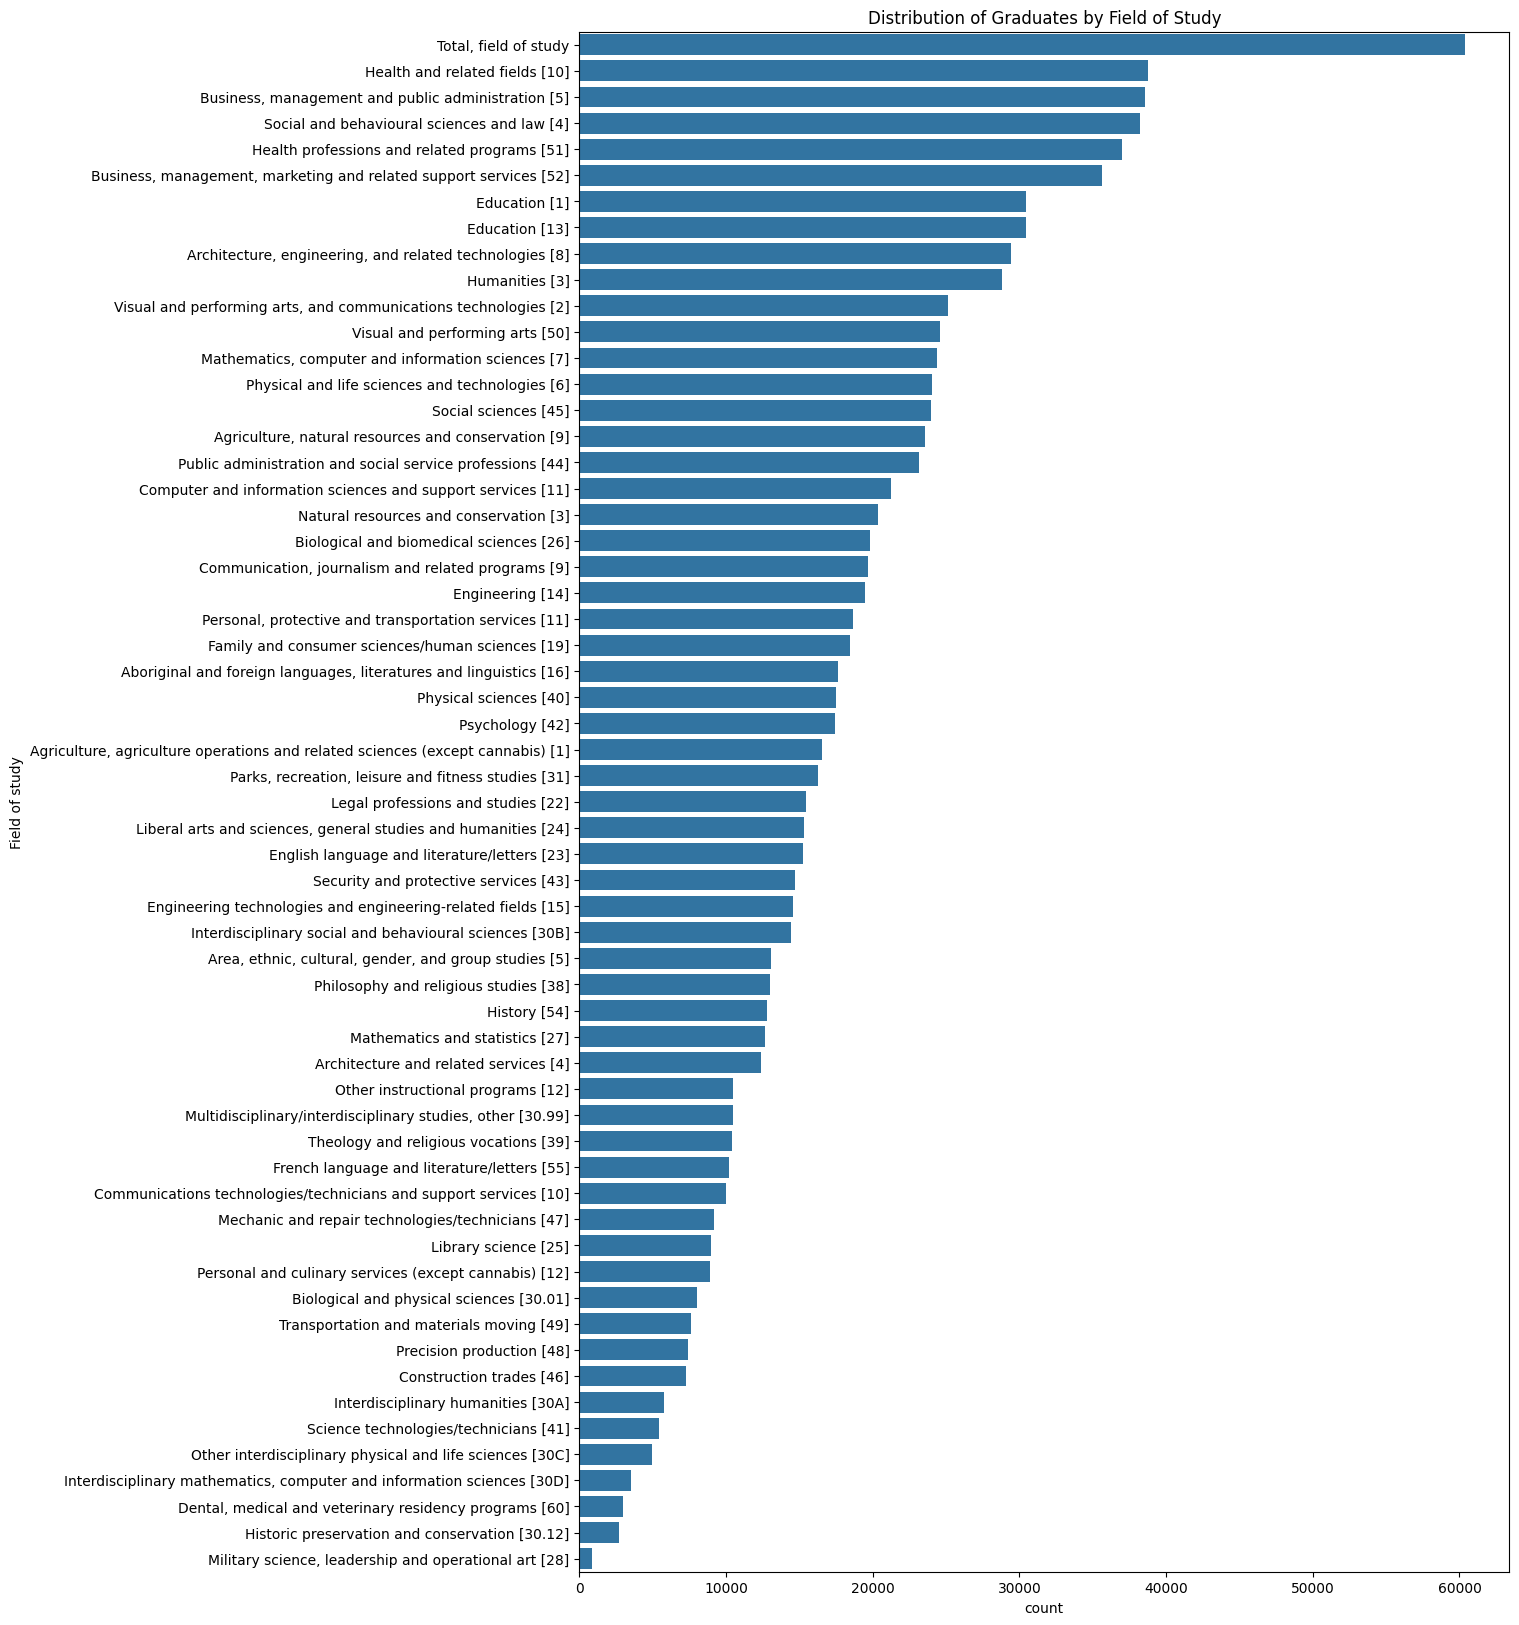

In [ ]:
# Field of Study distribution
plt.figure(figsize=(12, 20))
sns.countplot(data=df, y='Field of study', order=df['Field of study'].value_counts().index)
plt.title('Distribution of Graduates by Field of Study')
plt.show()


PIE CHART OF DIFFERENT EDUCATIONAL QUALIFICATION BY GENDER

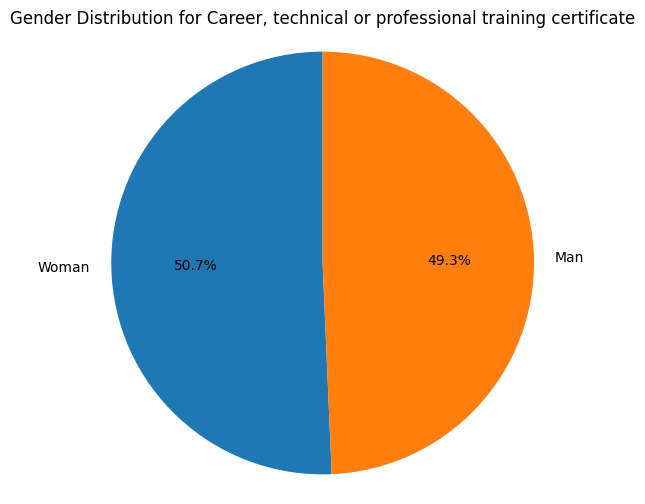

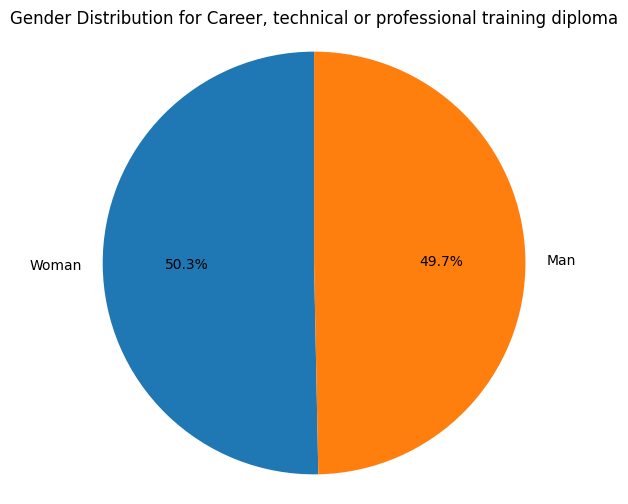

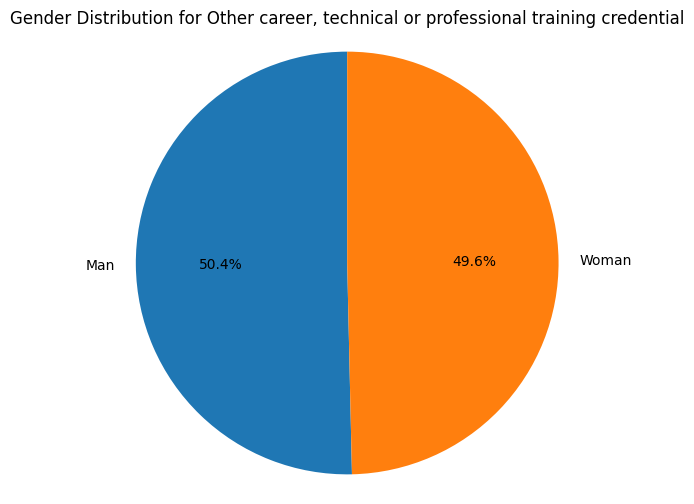

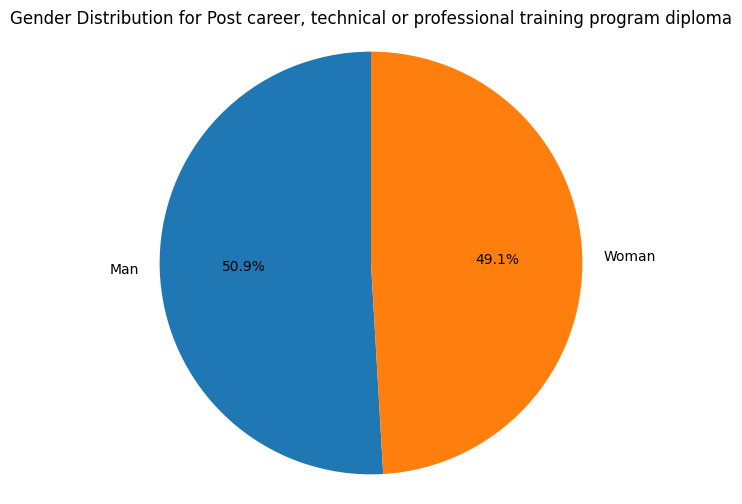

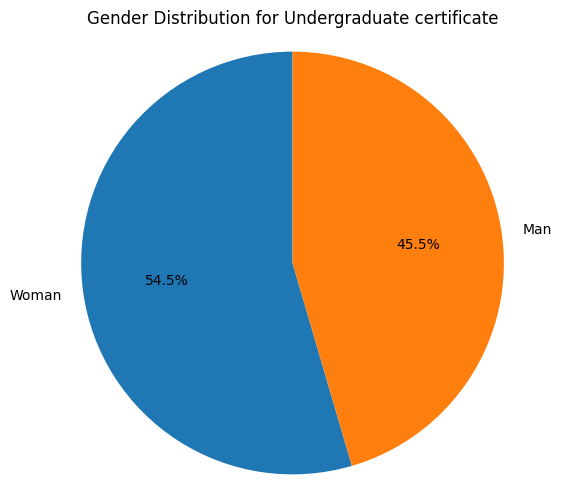

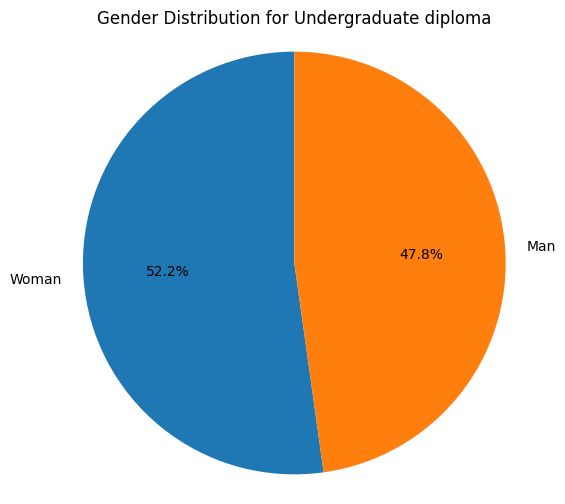

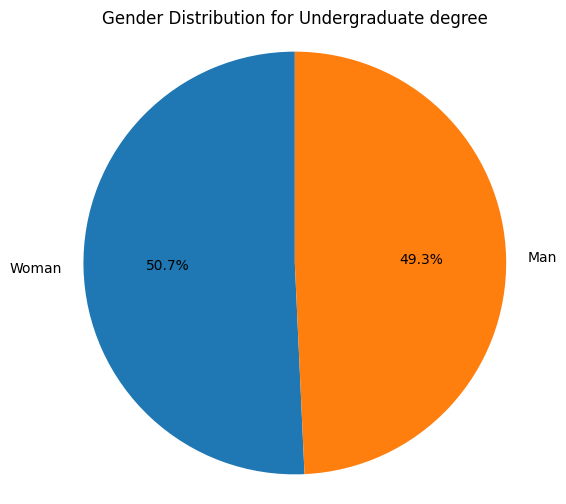

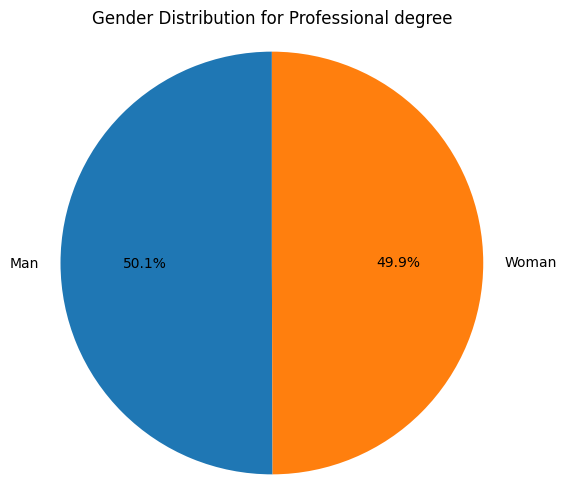

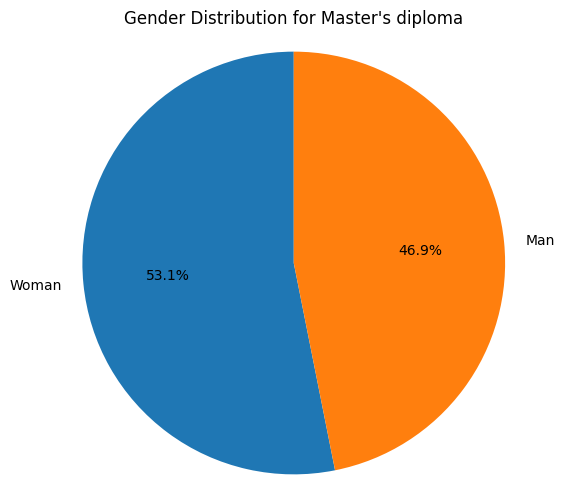

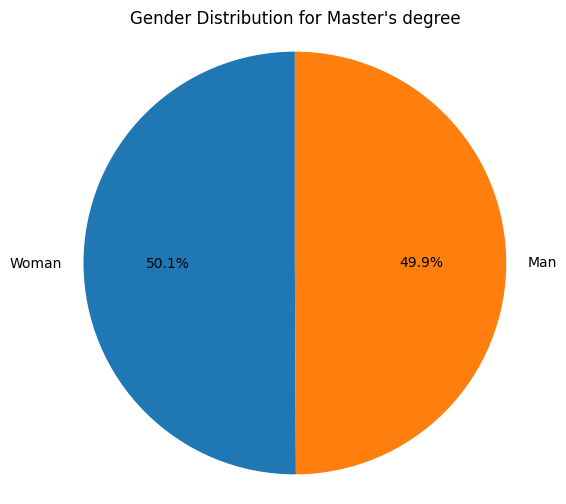

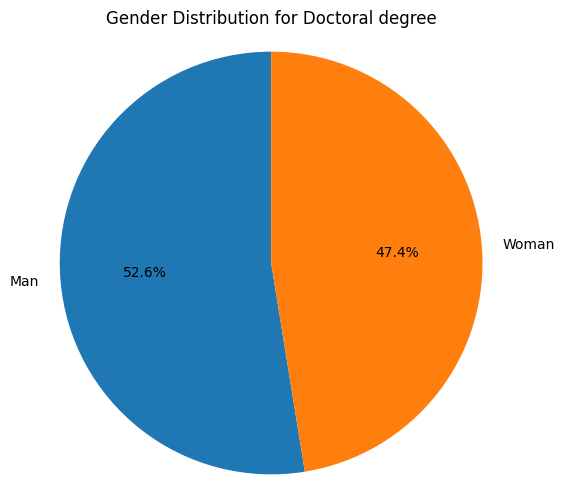

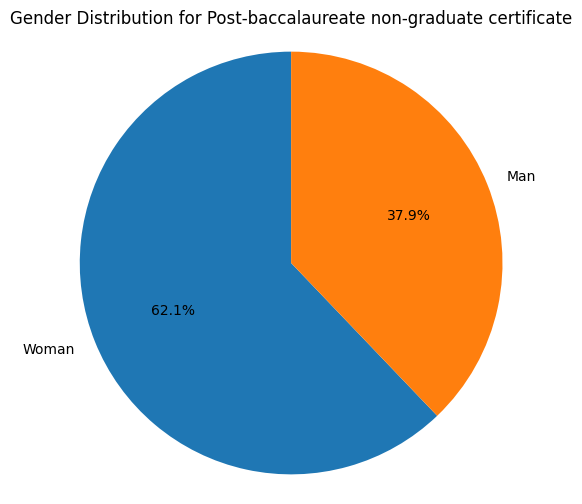

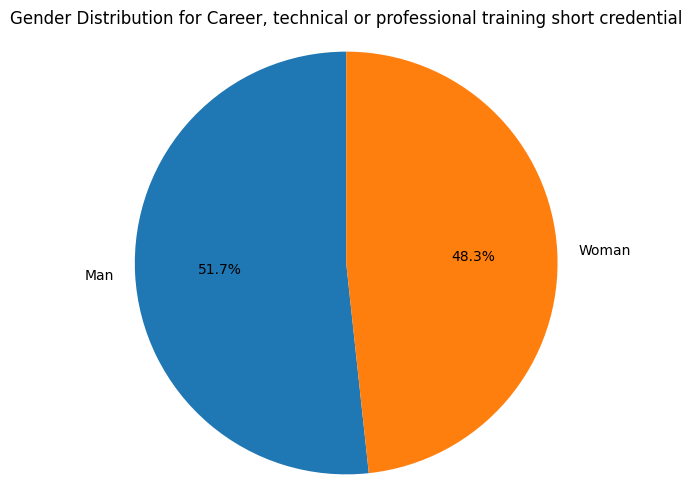

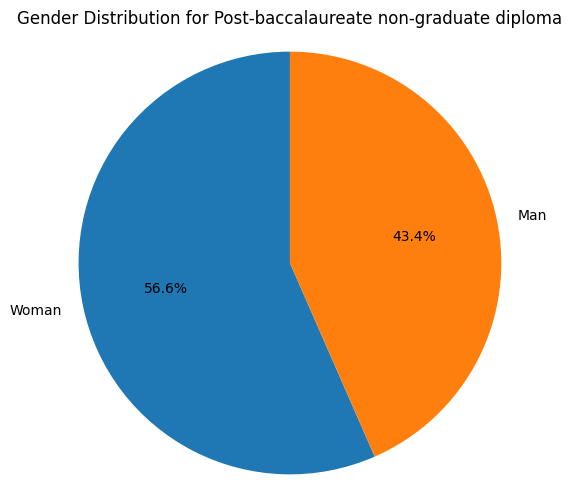

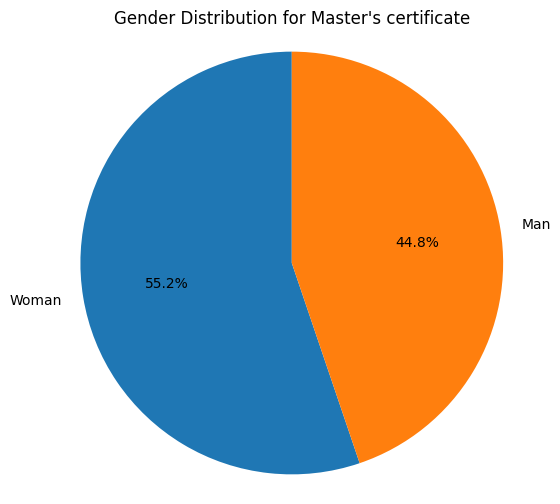

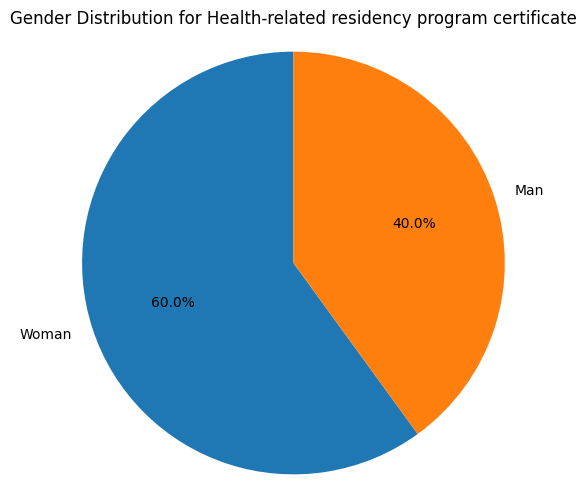

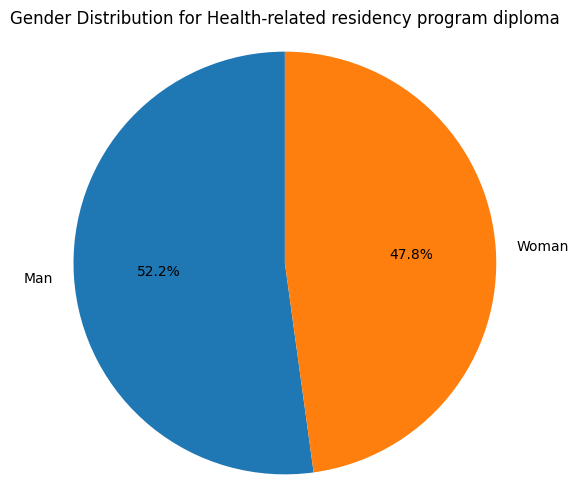

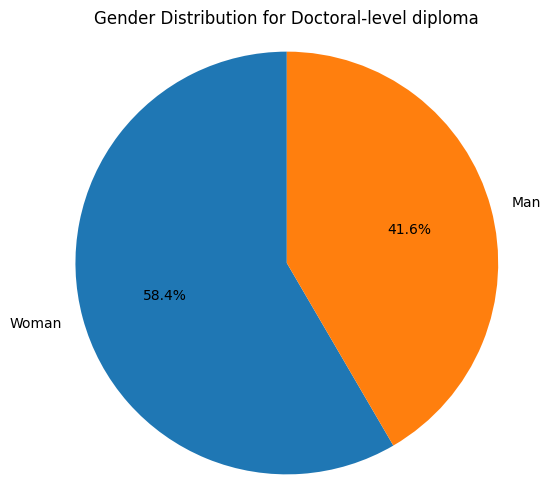

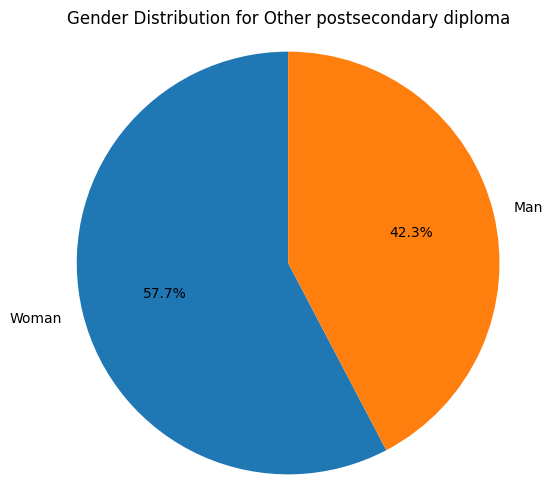

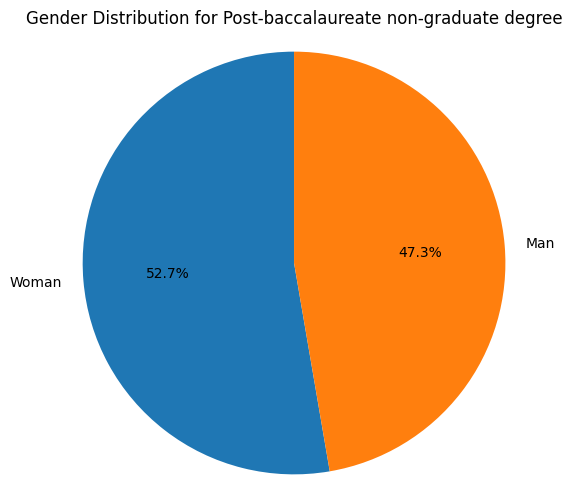

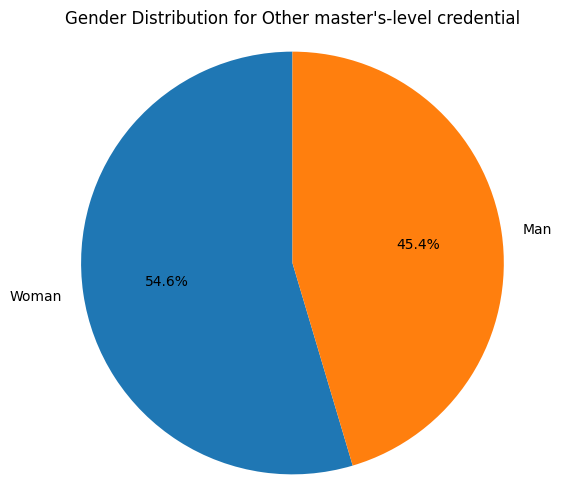

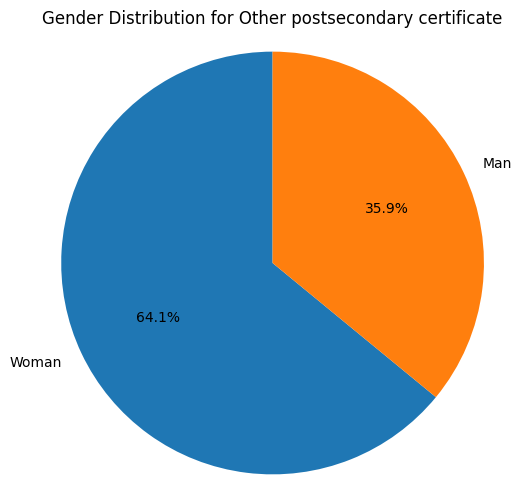

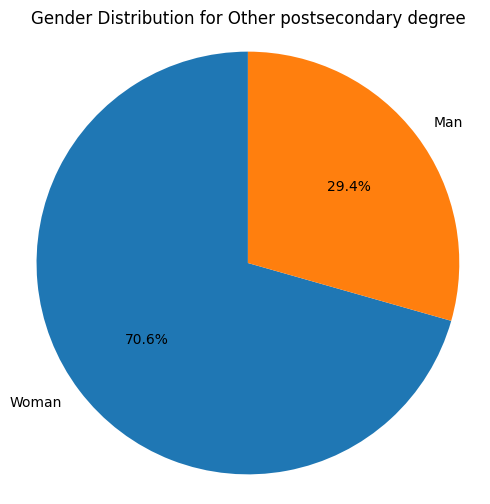

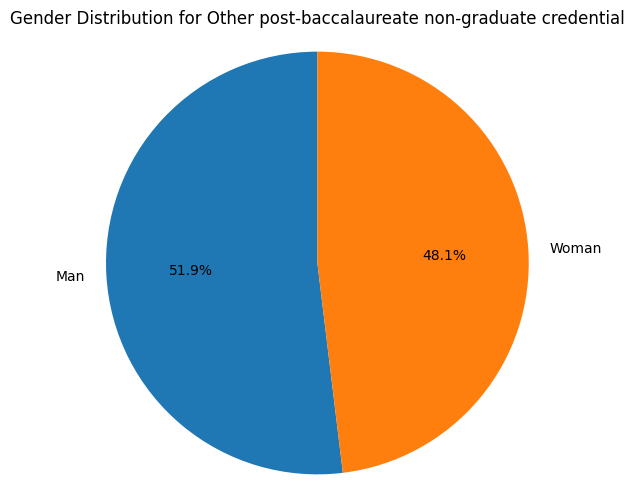

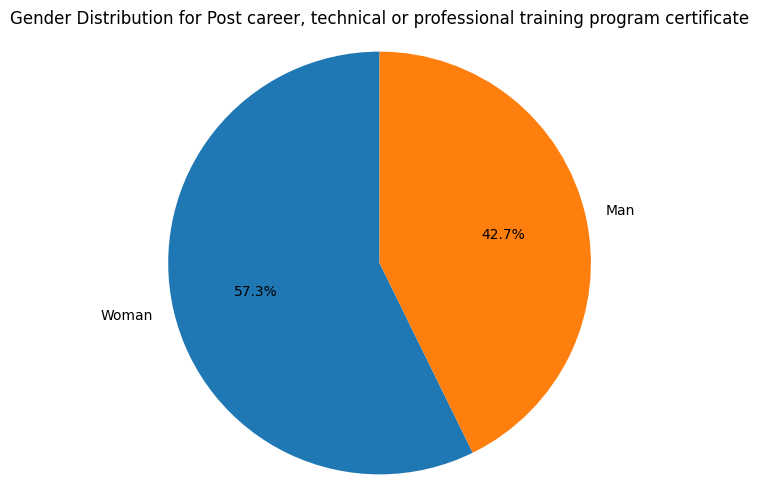

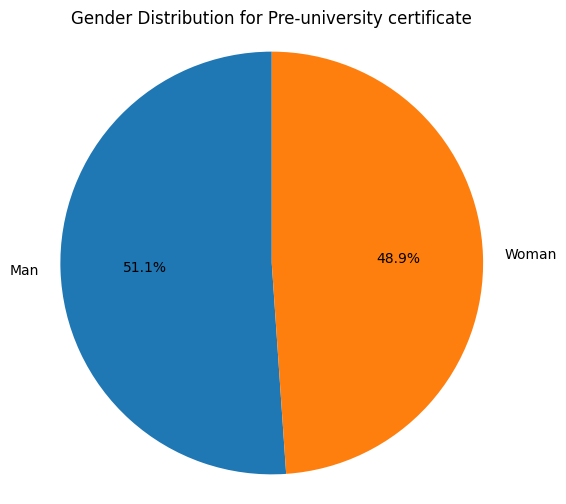

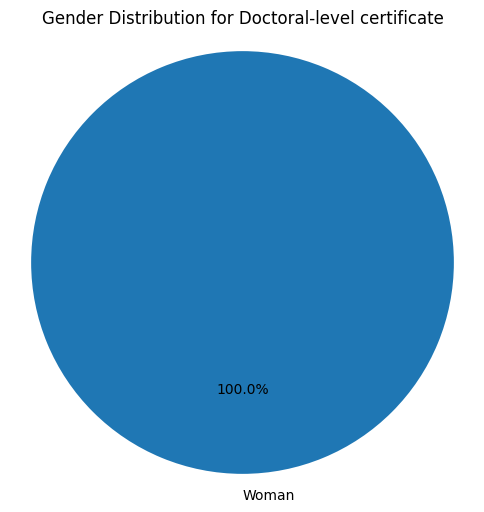

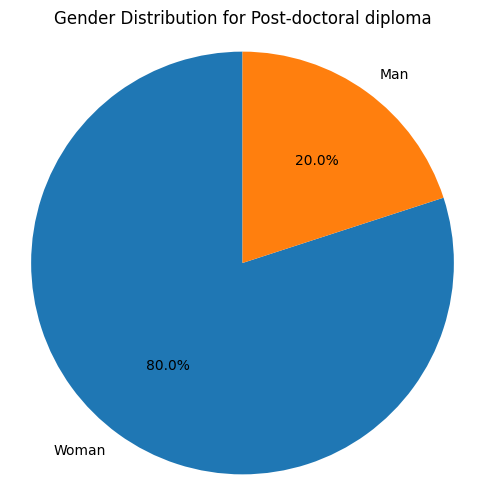

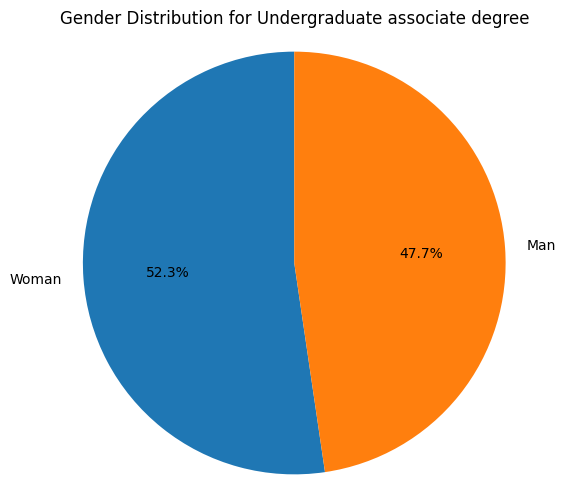

In [ ]:
# Get unique educational qualifications
edu_qualifications = df_cleaned['educational_qualification'].unique()

# Create a pie chart for each educational qualification
for edu_qual in edu_qualifications:
    # Filter data for the current educational qualification
    subset = df_cleaned[df_cleaned['educational_qualification'] == edu_qual]

    # Count gender occurrences
    gender_counts = subset['gender'].value_counts()

    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Gender Distribution for {edu_qual}')
    plt.axis('equal')
    plt.show()

# Calculating mean income for each age group

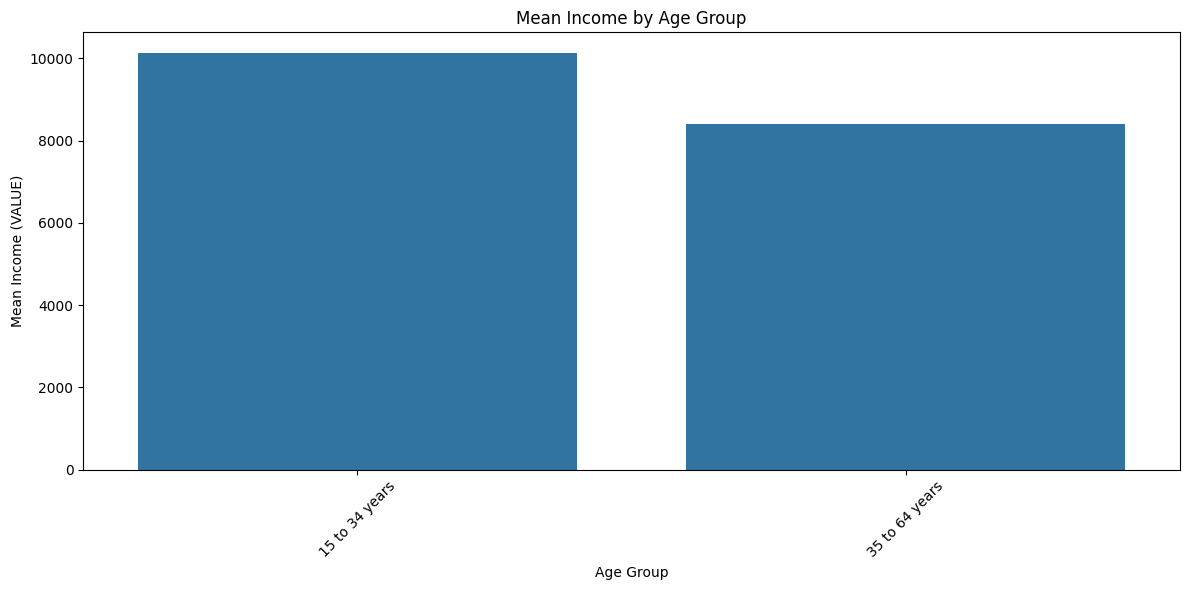

In [ ]:
# Calculate mean income for each age group
mean_income_by_age = df_cleaned.groupby('age_group')['value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='value', data=mean_income_by_age)
plt.title('Mean Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Income (VALUE)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
!pip install wordcloud


WORDCLOUD FOR VARIOUS FIELD OF STUDY

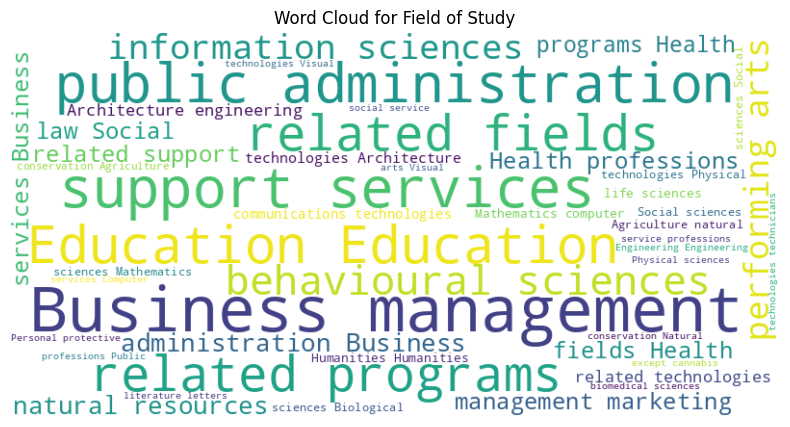

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. Combine all 'Field of study' values into a single string
text = " ".join(df_cleaned['field_of_study'].astype(str).dropna())

# 2. Create a WordCloud object with customized settings
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,  # Remove common words
    min_font_size=10  # Set minimum font size
).generate(text)

# 3. Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis display
plt.title("Word Cloud for Field of Study")
plt.show()

GRADUATION BY AGE GROUP AND GENDER

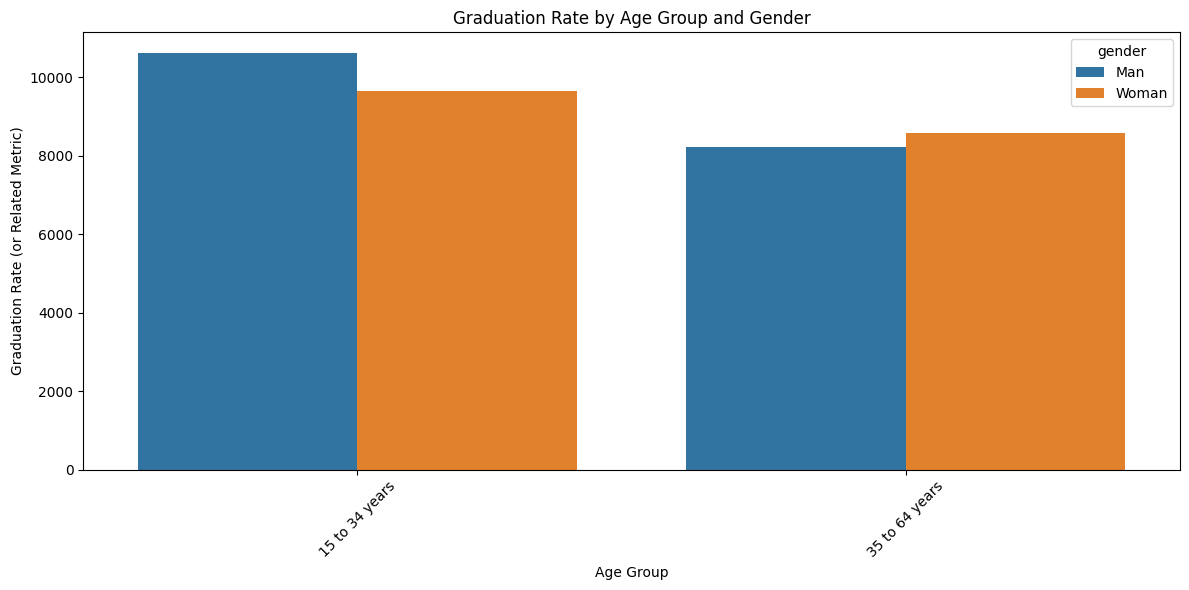

In [ ]:
# Assuming 'value' column represents graduation rate or a related metric

# 1. Group data by age group, gender, and calculate the mean graduation rate
graduation_rate = df_cleaned.groupby(['age_group', 'gender'])['value'].mean().reset_index()

# 2. Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=graduation_rate, x='age_group', y='value', hue='gender')
plt.title('Graduation Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Graduation Rate (or Related Metric)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

GRADUATES BY GEOGRAPHICAL LOCATION

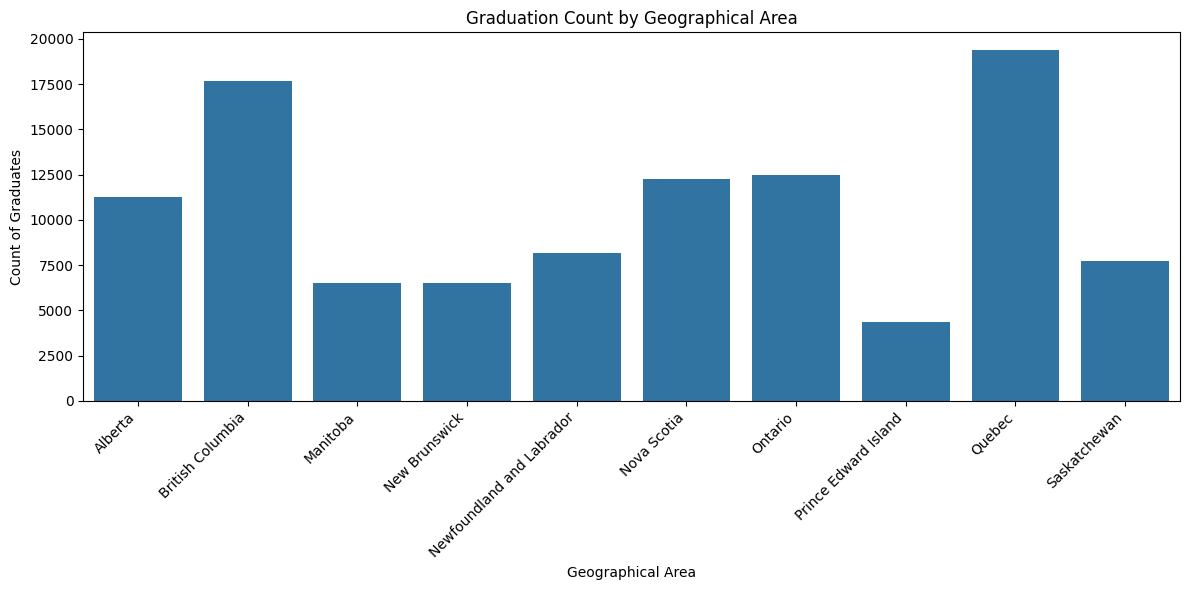

In [ ]:
# 1. Group data by 'geo' and calculate the count of graduates
graduation_count_by_geo = df_cleaned.groupby('geo')['value'].count().reset_index(name='count')

# 2. Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=graduation_count_by_geo, x='geo', y='count')
plt.title('Graduation Count by Geographical Area')
plt.xlabel('Geographical Area')
plt.ylabel('Count of Graduates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

COUNT OF GRADUATES IN DIFFERENT LOCATIONS BY YEAR

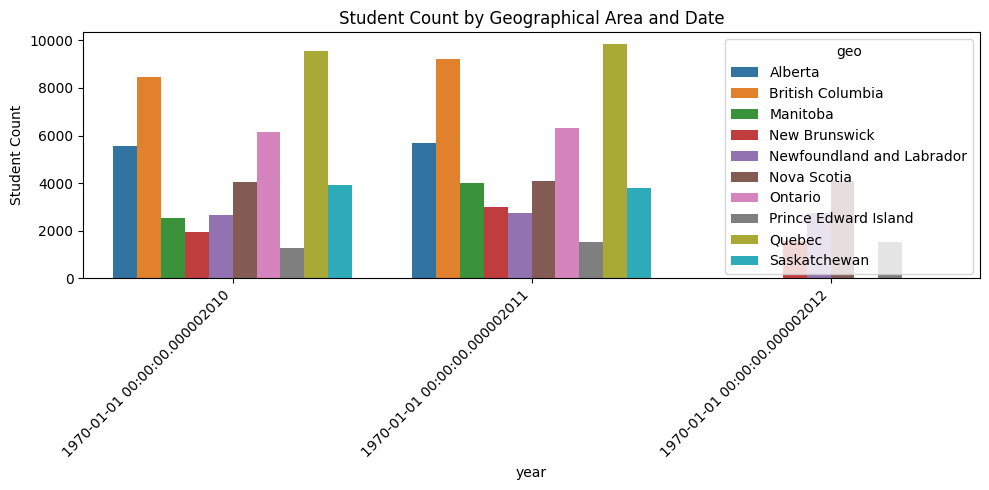

In [ ]:
# 1. Convert 'ref_date' to datetime objects
df_cleaned['ref_date'] = pd.to_datetime(df_cleaned['ref_date'], errors='coerce')

# 2. Group data by date and geo, then count occurrences
student_count_by_geo_date = df_cleaned.groupby(['ref_date', 'geo'])['value'].count().reset_index(name='count')

# 3. Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=student_count_by_geo_date, x='ref_date', y='count', hue='geo')
plt.title('Student Count by Geographical Area and Date')
plt.xlabel('year')
plt.ylabel('Student Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count the occurrences of each age group

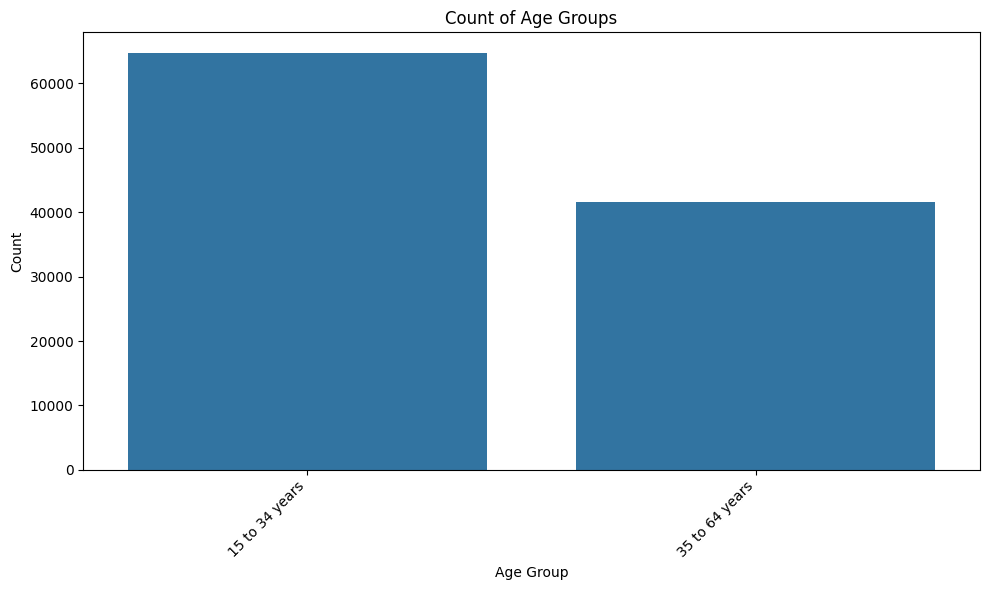

In [ ]:
#Count the occurrences of each age group
age_counts = df_cleaned['age_group'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Count of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

sum of categories of student status

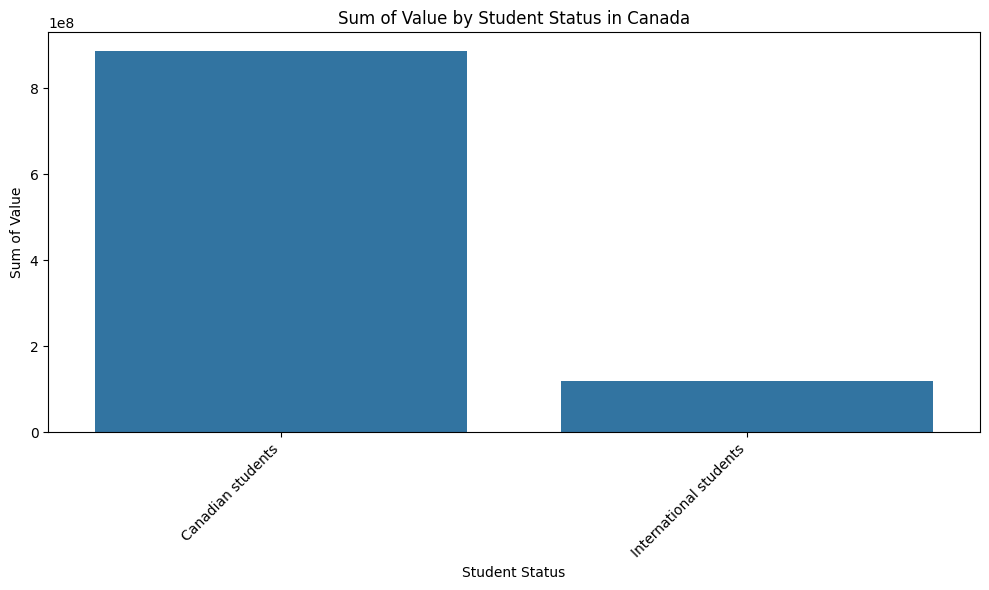

In [ ]:
# Group data by student status and calculate the sum of 'value'
status_value_sum = df_cleaned.groupby('status_of_student_in_canada')['value'].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='status_of_student_in_canada', y='value', data=status_value_sum)
plt.title('Sum of Value by Student Status in Canada')
plt.xlabel('Student Status')
plt.ylabel('Sum of Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

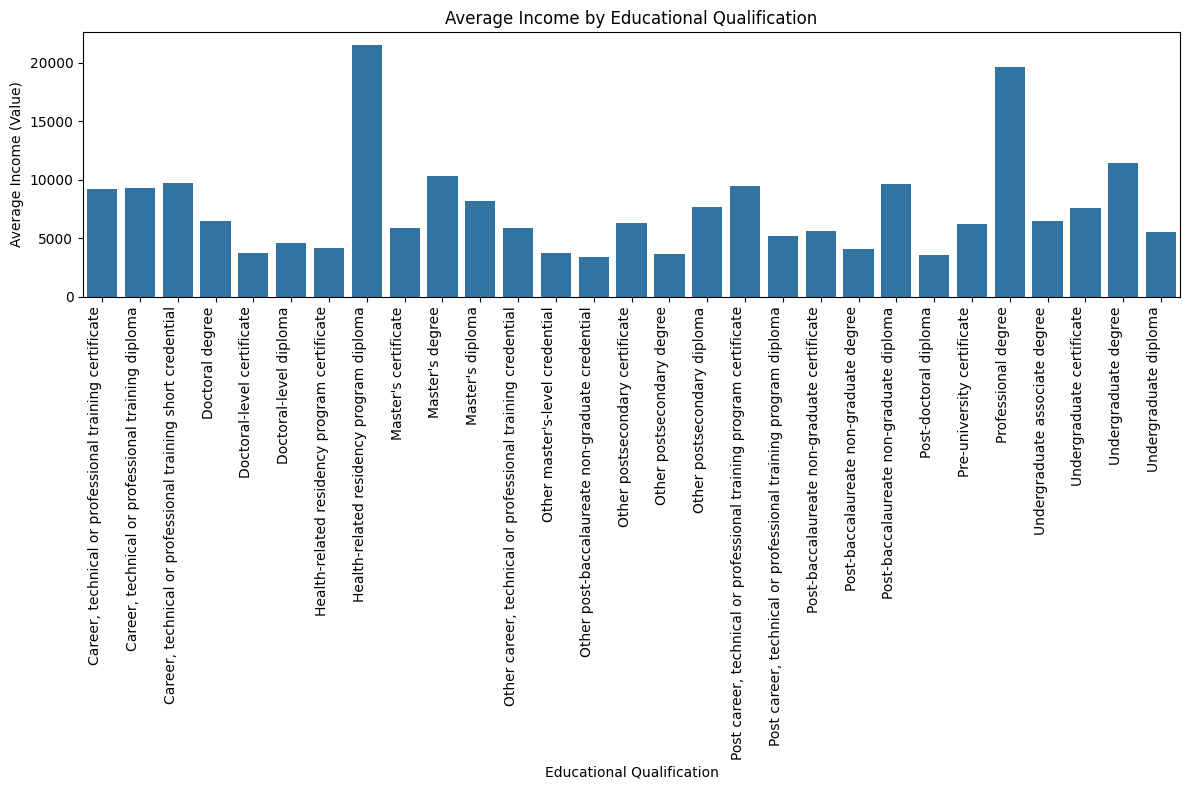

In [ ]:
# Calculate mean income for each educational qualification
edu_income_mean = df_cleaned.groupby('educational_qualification')['value'].mean().reset_index()

# Create the bar plot with increased figure height
plt.figure(figsize=(12, 8))  # Increased height from 6 to 8
sns.barplot(data=edu_income_mean, x='educational_qualification', y='value')
plt.title('Average Income by Educational Qualification')
plt.xlabel('Educational Qualification')
plt.ylabel('Average Income (Value)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

PRINTING TOP 10 MOST PAID FIELDS BY VALUE

In [ ]:
# Group by 'field_of_study' and calculate the median income
top_10_fields = df_cleaned.groupby('field_of_study')['value'].median().nlargest(10).reset_index()

# Print the result
print(top_10_fields)

                                      field_of_study        value
0  Dental, medical and veterinary residency progr...  8887.605096
1     Historic preservation and conservation [30.12]  8887.605096
2  Business, management and public administration...    80.000000
3                           Construction trades [46]    75.000000
4  Business, management, marketing and related su...    70.000000
5  Architecture, engineering, and related technol...    60.000000
6                                     Education [13]    50.000000
7                                      Education [1]    50.000000
8                     Health and related fields [10]    50.000000
9       Health professions and related programs [51]    50.000000


BAR CHART TOP 10 MOST EARNED FIELDS BY VALUE.

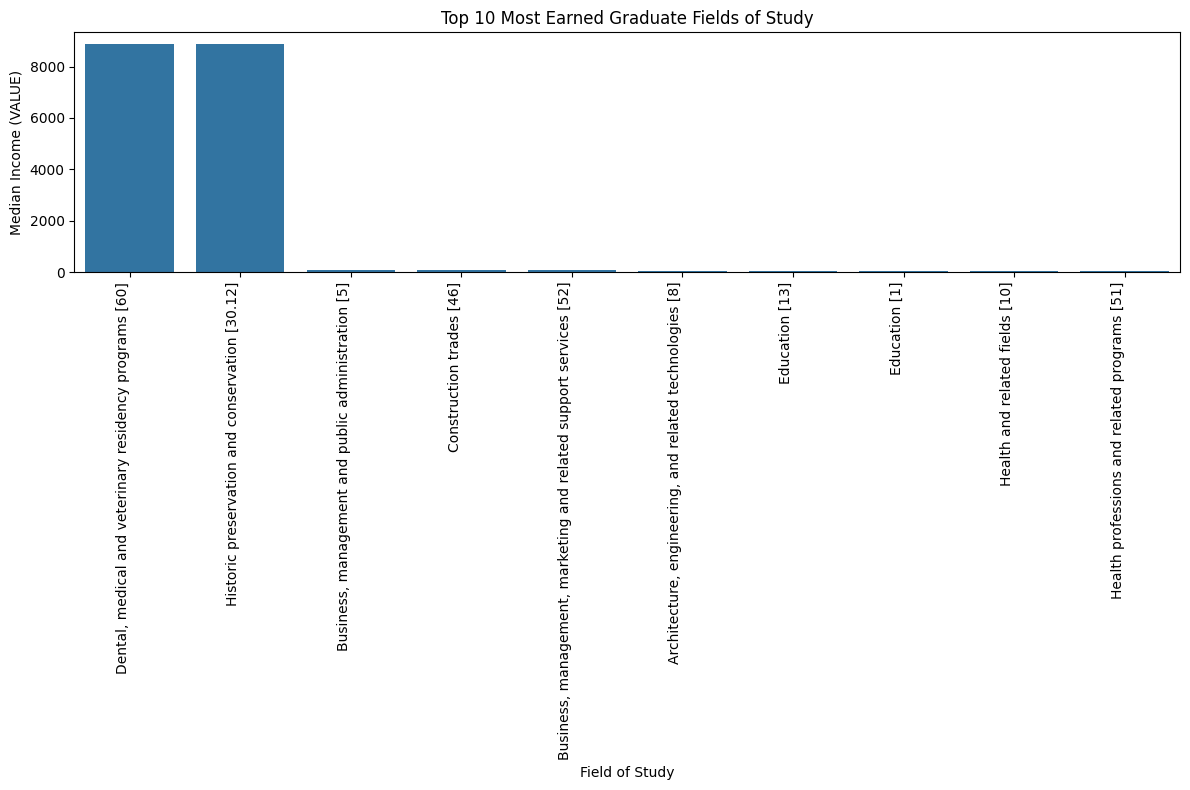

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'field_of_study' and calculate the median income
top_10_fields = df_cleaned.groupby('field_of_study')['value'].median().nlargest(10).reset_index()

# Create the bar plot using seaborn with increased figure height
plt.figure(figsize=(12, 8))  # Increased height from 6 to 8 or higher if needed
sns.barplot(data=top_10_fields, x='field_of_study', y='value')
plt.title('Top 10 Most Earned Graduate Fields of Study')
plt.xlabel('Field of Study')
plt.ylabel('Median Income (VALUE)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

PRINTING TOP 10 LEAST PAID FIELDS BY VALUE

In [ ]:
# Group by 'field_of_study' and calculate the median income
least_paid_fields = df_cleaned.groupby('field_of_study')['value'].median().nsmallest(10).reset_index()

# Print the result
print(least_paid_fields)

                                      field_of_study  value
0  Area, ethnic, cultural, gender, and group stud...   10.0
1                 Interdisciplinary humanities [30A]   10.0
2  Interdisciplinary mathematics, computer and in...   10.0
3                    Mathematics and statistics [27]   10.0
4  Military science, leadership and operational a...   10.0
5              Philosophy and religious studies [38]   10.0
6                             Physical sciences [40]   10.0
7              Theology and religious vocations [39]   10.0
8  Aboriginal and foreign languages, literatures ...   20.0
9  Agriculture, agriculture operations and relate...   20.0


BAR CHART TOP 10 LEAST EARNED FIELDS BY VALUE.

<ipython-input-49-8004e7f113a9>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


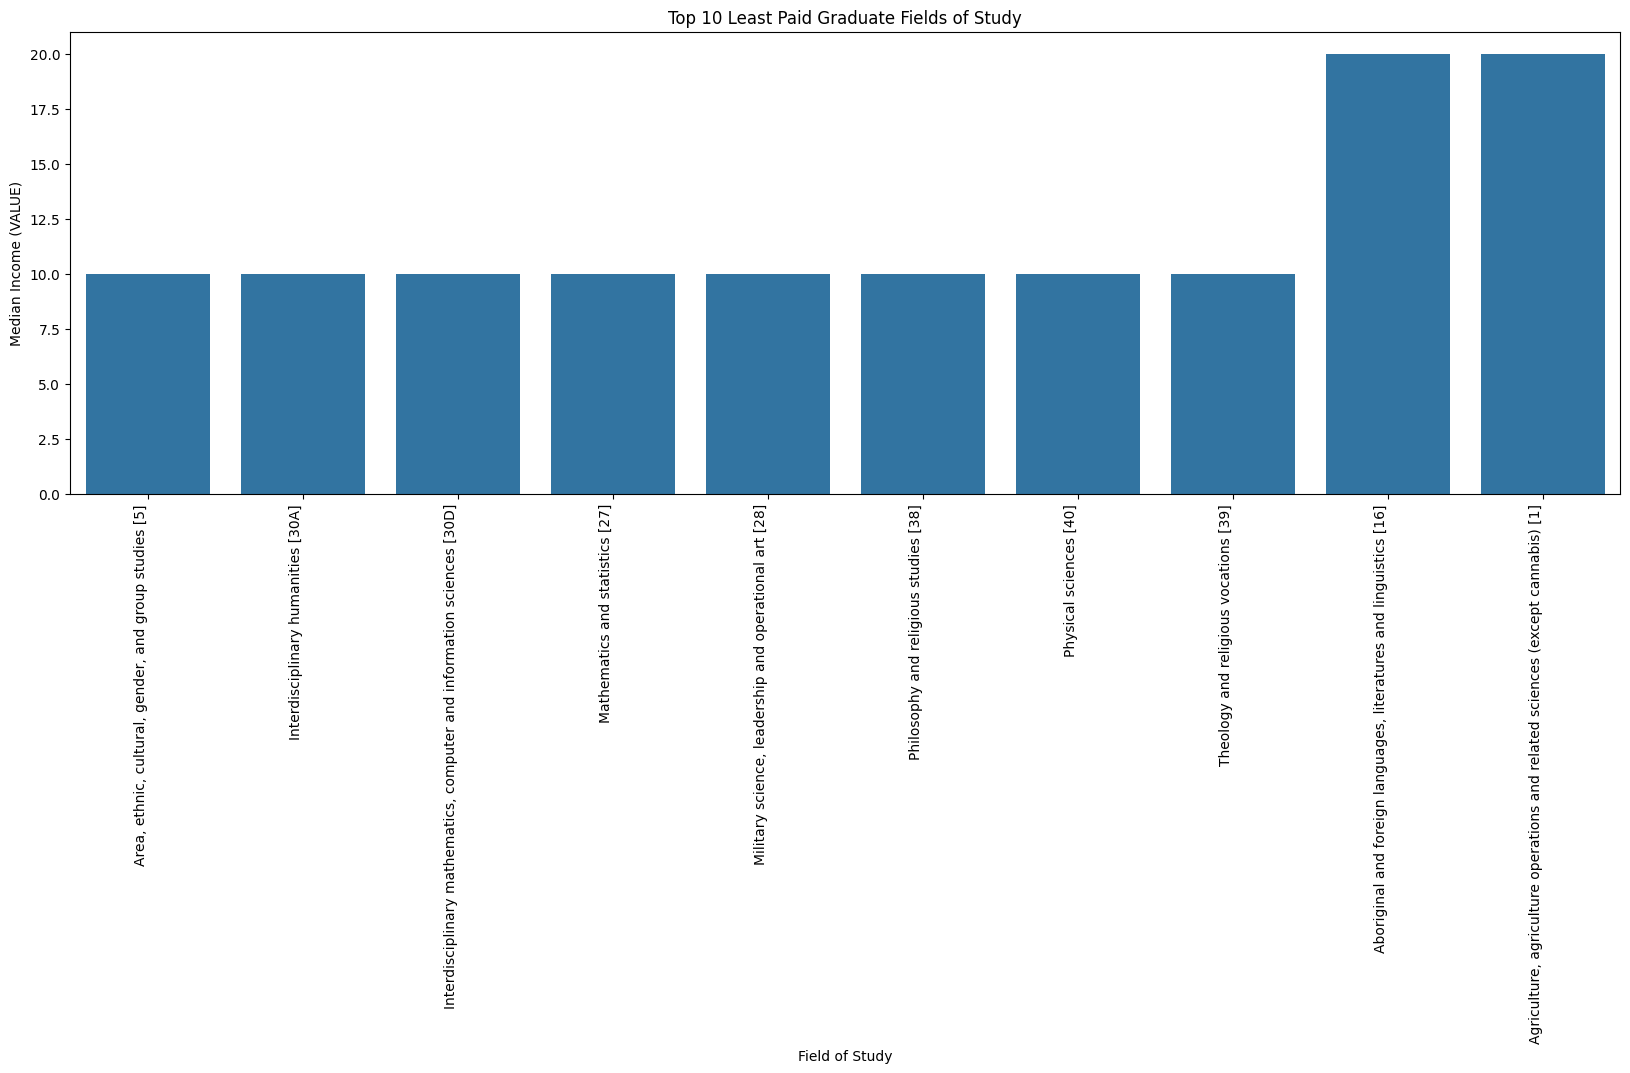

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'field_of_study' and calculate the median income
least_paid_fields = df_cleaned.groupby('field_of_study')['value'].median().nsmallest(10).reset_index()

# Create a bar chart
plt.figure(figsize=(20, 6))
sns.barplot(data=least_paid_fields, x='field_of_study', y='value')
plt.title('Top 10 Least Paid Graduate Fields of Study')
plt.xlabel('Field of Study')
plt.ylabel('Median Income (VALUE)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Grouping by 'field_of_study' and calculate the median income

In [ ]:
# Grouping by 'field_of_study' and calculate the median income
median_field_by_income = df_cleaned.groupby('field_of_study')['value'].median().reset_index()

# Find the field of study with the median income
median_income = median_field_by_income['value'].median()
median_field = median_field_by_income.loc[median_field_by_income['value'] == median_income, 'field_of_study'].values[0]

# Print the result
print("Median Field of Study by Income:", median_field)

Median Field of Study by Income: Aboriginal and foreign languages, literatures and linguistics [16]


 Printing the median income value

In [ ]:

# Printing the median income value
print("Median Income Value:", median_income)

Median Income Value: 20.0


DOWNLOADING THE CLEANED DATA

In [ ]:
from google.colab import files

df_cleaned.to_csv('cleaned_dataset.csv', index=False)
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**RECOMMENDATIONS**


1:To create a balance in the gender distribution of postsecondary graduates, equal encouragement/empowerment for both genders should be continuously encouraged.

2: Reasons for declines and absences of postsecondary graduates in the regions over the years should be investigated and managed appropriately and encouragements such as high percent scholarships should also be considered in those places.

3:Provision of targeted resources and assistance to international students to ensure comparable income levels with canadian students is recommended.

4:Investigate and implement strategies to improve income outcomes for graduates in lower-paying fields is also recommended.